In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import metrics

sns.set_style("darkgrid")

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [3]:
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
HomeCredit_columns_description = pd.read_csv('HomeCredit_columns_description.csv') #, encoding= 'unicode_escape')
installments_payments = pd.read_csv('installments_payments.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')
previous_application = pd.read_csv('previous_application.csv')
sample_submission = pd.read_csv('sample_submission.csv')

----------------------------------------------

## <center>1) Prise en main de la base de données</center>

### 1 - application_train

**application = demande (de prêt)**

In [4]:
application_train.shape

(307511, 122)

In [5]:
pd.set_option('display.max_columns', None)

application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
application_train.SK_ID_CURR.value_counts()

100401    1
239070    1
243164    1
230874    1
237017    1
         ..
154398    1
148253    1
150300    1
160539    1
100303    1
Name: SK_ID_CURR, Length: 307511, dtype: int64

**--> application_train contient un grand nombre d'indicateurs sur chaque prêt. 1 ligne = 1 prêt. Le tableau contient également une colonne "target" qui vaut 0 si le prêt a été remboursé, 1 sinon**

### 2 - application_test

In [7]:
application_test.shape

(48744, 121)

In [8]:
application_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

**--> application_test contient les même colonnes que application_train sauf la colonne "target". Ces deux tableaux sont créés pour être des split train/test lors de machine learning supervisé**

### 3 - bureau

In [9]:
bureau.shape

(1716428, 17)

In [10]:
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
application_train[application_train['SK_ID_CURR']==215354]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
99355,215354,0,Cash loans,F,Y,N,0,270000.0,720000.0,21181.5,720000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.028663,-17520,-939,-1203.0,-1064,4.0,1,1,0,1,0,0,Accountants,2.0,2,2,MONDAY,13,0,0,0,0,0,0,Trade: type 7,0.873736,0.522745,0.231439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,-1553.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [12]:
bureau[bureau['SK_ID_CURR']==215354]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.0,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.8,42103.80,0.00,0.0,Consumer credit,-22,NaN
225157,215354,5714458,Closed,currency 1,-1872,0,-776.0,-1203.0,NaN,0,494550.0,0.00,0.00,0.0,Consumer credit,-696,NaN
225158,215354,5714459,Closed,currency 1,-1734,0,-638.0,-1336.0,NaN,0,1084032.0,0.00,NaN,0.0,Car loan,-1336,NaN
225159,215354,5714460,Closed,currency 1,-1333,0,-1089.0,-987.0,NaN,0,102150.0,NaN,NaN,0.0,Consumer credit,-984,NaN


**--> bureau liste les données de crédits précédents, contractés dans un autre organisme que Home Credit, à ceux en cours chez Home Credit. 1 ligne correspond à un crédit précédent.**

### 4 - bureau_balance

In [13]:
bureau_balance.shape

(27299925, 3)

In [14]:
bureau_balance.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [15]:
bureau_balance[bureau_balance['SK_ID_BUREAU']==5715448]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


**--> bureau_balance semble présenter les paiements mensuels relatifs à chacun des crédit précédents (repertoriés dans "bureau"). 1 ligne correspond à 1 mois du crédit**

### 5 - credit_card_balance

In [16]:
credit_card_balance.shape

(3840312, 23)

In [17]:
credit_card_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [18]:
credit_card_balance[credit_card_balance['SK_ID_CURR']==215354].sort_values('MONTHS_BALANCE', ascending=False)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2866689,2340808,215354,-1,401144.985,450000,0.0,0.000,0.0,0.000,20061.315,20250.0,20250.000,380975.850,398211.480,398211.480,0.0,0,0.0,0.0,27.0,Active,0,0
910250,2340808,215354,-2,407511.405,450000,0.0,0.000,0.0,0.000,20459.565,0.0,0.000,386690.850,404533.890,404533.890,0.0,0,0.0,0.0,26.0,Active,0,0
415088,2340808,215354,-3,370571.985,450000,270000.0,270000.000,0.0,0.000,4366.935,22500.0,2040.435,364190.850,370571.985,370571.985,2.0,2,0.0,0.0,25.0,Active,0,0
2264373,2340808,215354,-4,130543.650,450000,45000.0,48150.000,0.0,3150.000,20981.430,4500.0,133.065,125778.285,129198.150,129198.150,1.0,2,0.0,1.0,24.0,Active,0,0
1030307,2340808,215354,-5,55493.280,450000,0.0,1368.000,0.0,1368.000,18839.970,342000.0,321018.570,50628.285,55493.280,55493.280,0.0,1,0.0,1.0,23.0,Active,0,0
2062452,2340808,215354,-6,409706.730,450000,45000.0,47250.000,0.0,2250.000,18948.375,37849.5,19009.530,402899.355,408361.230,408361.230,1.0,2,0.0,1.0,22.0,Active,0,0
489652,2340808,215354,-7,383473.665,450000,0.0,90000.000,0.0,90000.000,13186.170,13500.0,13500.000,367223.400,380646.045,380646.045,0.0,1,0.0,1.0,21.0,Active,0,0
2030170,2340808,215354,-8,294434.955,450000,27000.0,117000.000,0.0,90000.000,15947.640,155700.0,155700.000,280771.560,291135.420,291135.420,1.0,2,0.0,1.0,20.0,Active,0,0
2768609,2340808,215354,-9,324466.380,450000,0.0,519.120,0.0,519.120,16252.920,17775.0,17775.000,307802.790,322100.280,322100.280,0.0,1,0.0,1.0,19.0,Active,0,0
3555301,2340808,215354,-10,330098.625,450000,0.0,1350.000,0.0,1350.000,17010.450,30150.0,30150.000,313429.095,327685.230,327685.230,0.0,1,0.0,1.0,18.0,Active,0,0


**--> credit_card_balance semble décrire le comportement des clients de précédents prêts contractés chez Home Credit (pour des clients liés à des prêts en cours**

### 6 - HomeCredit_columns_description

In [19]:
HomeCredit_columns_description.shape

(219, 5)

In [20]:
HomeCredit_columns_description.head(5)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


**--> HomeCredit_columns_description décrit toutes les colonnes de chaque fichier disponible**

### 7 - installments_payments

**installment = versement / mensualité**

In [21]:
installments_payments.shape

(13605401, 8)

In [22]:
installments_payments.head(5)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [23]:
pd.options.display.max_rows = 150

installments_payments[installments_payments['SK_ID_CURR']==215354].sort_values('DAYS_INSTALMENT', ascending=True)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
4327351,1362380,215354,1.0,1,-2548.0,-2552.0,5384.295,5384.295
5702561,1362380,215354,1.0,2,-2518.0,-2527.0,5384.295,5384.295
6402849,1362380,215354,1.0,3,-2488.0,-2498.0,5384.295,5384.295
5381276,1362380,215354,1.0,4,-2458.0,-2477.0,5384.295,5384.295
4331538,1362380,215354,1.0,5,-2428.0,-2477.0,5384.295,5384.295
7584543,1362380,215354,1.0,6,-2398.0,-2477.0,5384.295,5384.295
5401421,1362380,215354,1.0,7,-2368.0,-2371.0,5384.295,5384.295
4848591,1362380,215354,1.0,8,-2338.0,-2342.0,5352.300,5352.300
7290792,2829838,215354,1.0,1,-887.0,-898.0,51081.750,51081.750
4095294,2340808,215354,0.0,1,-884.0,-884.0,137025.000,137025.000


**--> installments_payments semble établir l'historique des paiements de précédents crédits Home Office. 1 ligne correspond à 1 paiement**

### 8 - POS_CASH_balance

In [24]:
POS_CASH_balance.shape

(10001358, 8)

In [25]:
POS_CASH_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [26]:
POS_CASH_balance[POS_CASH_balance['SK_ID_CURR']==215354].sort_values('MONTHS_BALANCE')

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
4802353,1362380,215354,-84,8.0,8.0,Active,0,0
4355326,1362380,215354,-83,8.0,7.0,Active,0,0
8923143,1362380,215354,-82,8.0,6.0,Active,0,0
4374636,1362380,215354,-81,8.0,5.0,Active,0,0
3710204,1362380,215354,-80,8.0,4.0,Active,0,0
1687741,1362380,215354,-79,8.0,3.0,Active,0,0
6039050,1362380,215354,-78,8.0,2.0,Active,0,0
2087412,1362380,215354,-77,8.0,1.0,Active,0,0
3978019,1362380,215354,-76,8.0,0.0,Completed,0,0
4226722,2829838,215354,-30,48.0,48.0,Active,0,0


**--> POS_CASH_balance décrit le remboursement mensuel de prêts précédents chez Home Credit. 1 ligne représente 1 mois de remboursement**

### 9 - previous_application

In [27]:
previous_application.shape

(1670214, 37)

In [28]:
previous_application.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**--> previous_application décrit les précédentes demandes de prêt. 1 ligne correspond à 1 demande de prêt**

### 10 - sample_submission

In [29]:
sample_submission.shape

(48744, 2)

In [30]:
sample_submission.head(5)

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [31]:
sample_submission.TARGET.value_counts()

0.5    48744
Name: TARGET, dtype: int64

In [32]:
sample_submission.SK_ID_CURR.value_counts()

131072    1
234556    1
312077    1
381711    1
366909    1
         ..
114077    1
175519    1
411012    1
410679    1
198655    1
Name: SK_ID_CURR, Length: 48744, dtype: int64

**--> sample submission contient l'ensemble des identifiants de demandes de prêt contenues dans "application_test"**

----------------------

## <center>2) Sélection d'un modèle Kaggle</center>

**Nous choisissons le modèle Kaggle suivant :**

https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

------------------

## <center>3) Exploration de données : base de données application_train / application_test</center>

**Pour le moment, nous allons nous focaliser sur les données disponibles dans la base de données "application_train"**

### 1 - Types de variables

In [33]:
# Number of each type of column
application_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [34]:
var_num = []
var_cat = []

for i in application_train.columns:
    if (application_train[i].dtypes == 'int64') | (application_train[i].dtypes == 'float64'):
        var_num.append(i)
    else:
        var_cat.append(i)

In [35]:
len(var_num)

106

In [36]:
len(var_cat)

16

**Parmi ces 16 variables catégorielles, combien de valeurs prises pour chacune ?**

In [37]:
# Number of unique classes in each object column
application_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### 2 - Valeurs manquantes

In [38]:
column = []
isna = []
types = []

for i in application_train.columns:
    types.append(application_train[i].dtypes)
    column.append(i)
    isna.append(round(application_train.loc[:, i].isna().mean()*100,2))

In [39]:
pd.DataFrame(list(zip(column, types, isna)), columns =['column', 'Type', '% NaN']).sort_values('% NaN', ascending=False)

,column,Type,% NaN
76,COMMONAREA_MEDI,float64,69.87
48,COMMONAREA_AVG,float64,69.87
62,COMMONAREA_MODE,float64,69.87
70,NONLIVINGAPARTMENTS_MODE,float64,69.43
56,NONLIVINGAPARTMENTS_AVG,float64,69.43
84,NONLIVINGAPARTMENTS_MEDI,float64,69.43
86,FONDKAPREMONT_MODE,object,68.39
68,LIVINGAPARTMENTS_MODE,float64,68.35
54,LIVINGAPARTMENTS_AVG,float64,68.35
82,LIVINGAPARTMENTS_MEDI,float64,68.35


**Nous allons observer le nombre de manquants par ligne pour évaluer si les manquants se trouvent sur les mêmes lignes**

In [40]:
application_train['NaN_count'] = application_train.isnull().sum(axis=1)

In [41]:
application_train[application_train['NaN_count']>=50].shape

(45186, 123)

**Le nombre de lignes avec 50 valeurs manquantes ou plus représentent environ 15% du dataset --> on va supprimer ces lignes**

In [42]:
indexes = application_train[application_train['NaN_count']>=50].index.to_list()

In [43]:
application_train = application_train.drop(application_train.index[indexes])
application_train = application_train.drop(columns = 'NaN_count')

In [44]:
application_train.shape

(262325, 122)

**Nous devons effectuer la même opération sur application_test !**

In [45]:
application_test['NaN_count'] = application_test.isnull().sum(axis=1)

In [46]:
application_test[application_test['NaN_count']>=50].shape

(6047, 122)

In [47]:
indexes = application_test[application_test['NaN_count']>=50].index.to_list()
application_test = application_test.drop(application_test.index[indexes])
application_test = application_test.drop(columns = 'NaN_count')
application_test.shape

(42697, 121)

**Observons de nouveau les manquants dans application_train :**

In [48]:
column = []
isna = []
types = []

for i in application_train.columns:
    types.append(application_train[i].dtypes)
    column.append(i)
    isna.append(round(application_train.loc[:, i].isna().mean()*100,2))

In [49]:
pd.DataFrame(list(zip(column, types, isna)), columns =['column', 'Type', '% NaN']).sort_values('% NaN', ascending=False)

,column,Type,% NaN
76,COMMONAREA_MEDI,float64,64.68
48,COMMONAREA_AVG,float64,64.68
62,COMMONAREA_MODE,float64,64.68
56,NONLIVINGAPARTMENTS_AVG,float64,64.17
84,NONLIVINGAPARTMENTS_MEDI,float64,64.17
70,NONLIVINGAPARTMENTS_MODE,float64,64.17
86,FONDKAPREMONT_MODE,object,62.94
21,OWN_CAR_AGE,float64,62.91
68,LIVINGAPARTMENTS_MODE,float64,62.90
82,LIVINGAPARTMENTS_MEDI,float64,62.90


**--> Nous ne prenons pas de décision pour le moment sur l'éventuelle suppression de colonnes, ni sur l'imputation des manquants**

### 3 - Analyses univariées

#### a) Target

**Nous allons observer la répartition de notre cible : 0 prêt remboursé, 1 prêt non remboursé**

In [50]:
application_train['TARGET'].value_counts()

0    241830
1     20495
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

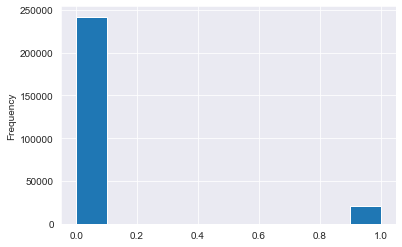

In [51]:
application_train['TARGET'].astype(int).plot.hist()

**--> les 2 catégories 0 et 1 ne sont pas équilibrées en termes d'effectif : environ 7,8% des prêts sont refusés**

#### b) Describe des variables numériques

In [52]:
application_train['SK_ID_CURR'].nunique()

262325

In [53]:
for i in var_num:
    print('------')
    print('Colonne : ', i)
    print('Nb valeurs uniques prises :', application_train[i].nunique(), '(nb total lignes : ', application_train.shape[0], ')')
    print(application_train[i].describe())

------
Colonne :  SK_ID_CURR
Nb valeurs uniques prises : 262325 (nb total lignes :  262325 )
count    262325.000000
mean     278234.484277
std      102797.067626
min      100002.000000
25%      189170.000000
50%      278291.000000
75%      367239.000000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
------
Colonne :  TARGET
Nb valeurs uniques prises : 2 (nb total lignes :  262325 )
count    262325.000000
mean          0.078128
std           0.268374
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
------
Colonne :  CNT_CHILDREN
Nb valeurs uniques prises : 15 (nb total lignes :  262325 )
count    262325.000000
mean          0.437381
std           0.729964
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
------
Colonne :  AMT_INCOME_TOTAL
Nb valeurs uniques prises : 2247 (nb total ligne

Nb valeurs uniques prises : 812 (nb total lignes :  262325 )
count    227684.000000
mean          0.508391
std           0.195104
min           0.000527
25%           0.367291
50%           0.531686
75%           0.665855
max           0.893976
Name: EXT_SOURCE_3, dtype: float64
------
Colonne :  APARTMENTS_AVG
Nb valeurs uniques prises : 2339 (nb total lignes :  262325 )
count    151442.000000
mean          0.117445
std           0.108241
min           0.000000
25%           0.057700
50%           0.087600
75%           0.148500
max           1.000000
Name: APARTMENTS_AVG, dtype: float64
------
Colonne :  BASEMENTAREA_AVG
Nb valeurs uniques prises : 3780 (nb total lignes :  262325 )
count    127567.000000
mean          0.088442
std           0.082438
min           0.000000
25%           0.044200
50%           0.076300
75%           0.112200
max           1.000000
Name: BASEMENTAREA_AVG, dtype: float64
------
Colonne :  YEARS_BEGINEXPLUATATION_AVG
Nb valeurs uniques prises : 285 (nb to

Colonne :  NONLIVINGAREA_MODE
Nb valeurs uniques prises : 3327 (nb total lignes :  262325 )
count    137829.000000
mean          0.027022
std           0.070254
min           0.000000
25%           0.000000
50%           0.001100
75%           0.023100
max           1.000000
Name: NONLIVINGAREA_MODE, dtype: float64
------
Colonne :  APARTMENTS_MEDI
Nb valeurs uniques prises : 1148 (nb total lignes :  262325 )
count    151442.000000
mean          0.117855
std           0.109077
min           0.000000
25%           0.058300
50%           0.086400
75%           0.148900
max           1.000000
Name: APARTMENTS_MEDI, dtype: float64
------
Colonne :  BASEMENTAREA_MEDI
Nb valeurs uniques prises : 3772 (nb total lignes :  262325 )
count    127567.000000
mean          0.087955
std           0.082179
min           0.000000
25%           0.043700
50%           0.075800
75%           0.111600
max           1.000000
Name: BASEMENTAREA_MEDI, dtype: float64
------
Colonne :  YEARS_BEGINEXPLUATATION_M

Nb valeurs uniques prises : 2 (nb total lignes :  262325 )
count    262325.000000
mean          0.000008
std           0.002761
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_12, dtype: float64
------
Colonne :  FLAG_DOCUMENT_13
Nb valeurs uniques prises : 2 (nb total lignes :  262325 )
count    262325.000000
mean          0.004026
std           0.063319
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_13, dtype: float64
------
Colonne :  FLAG_DOCUMENT_14
Nb valeurs uniques prises : 2 (nb total lignes :  262325 )
count    262325.000000
mean          0.003324
std           0.057559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_14, dtype: float64
------
Colonne :  FLAG_DOCUMENT_15
Nb valeurs uniques prises : 2 (nb total lignes : 

**Nous allons examiner plus en détail :  
DAYS_BIRTH (valeurs négatives)  
DAYS_EMPLOYED (valeurs négatives)  
DAYS_REGISTRATION (valeurs négatives)  
DAYS_ID_PUBLISH (valeurs négatives)  
OBS_30_CNT_SOCIAL_CIRCLE (outlier manifeste)  
DEF_30_CNT_SOCIAL_CIRCLE (outlier manifeste)  
OBS_60_CNT_SOCIAL_CIRCLE (outlier manifeste)  
DEF_60_CNT_SOCIAL_CIRCLE (outlier manifeste)  
DAYS_LAST_PHONE_CHANGE (valeurs négatives)  
AMT_REQ_CREDIT_BUREAU_MON (outlier manifeste)  
AMT_REQ_CREDIT_BUREAU_YEAR (outlier manifeste)**

#### c) Gestion des valeurs abérrantes

**DAYS_BIRTH**

Text(0.5, 0, 'DAYS_BIRTH')

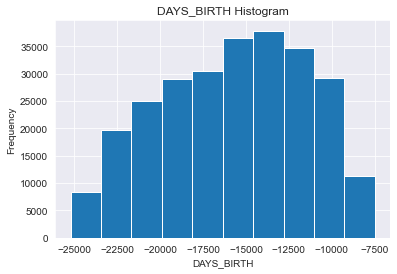

In [54]:
application_train['DAYS_BIRTH'].plot.hist(title = 'DAYS_BIRTH Histogram')
plt.xlabel('DAYS_BIRTH')

**--> à priori pas de valeurs abérrantes**

**DAYS_EMPLOYED**

Text(0.5, 0, 'DAYS_EMPLOYED')

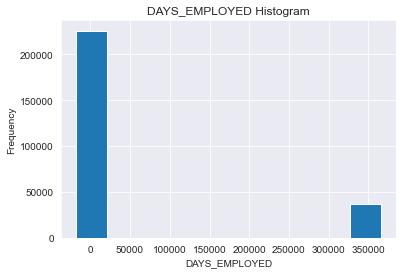

In [55]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYED Histogram')
plt.xlabel('DAYS_EMPLOYED')

**Nous avons visiblement des valeurs abérrantes !**

In [56]:
application_train[application_train['DAYS_EMPLOYED']>50000].head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,NaN,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.587334,0.205747,0.751724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,NaN,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.722044,0.555183,0.652897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,NaN,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,NaN,0.624305,0.669057,0.1443,0.0848,0.9876,0.830,0.1064,0.14,0.1207,0.3750,0.4167,0.2371,0.1173,0.1484,0.0019,0.0007,0.1261,0.0754,0.9876,0.8367,0.0000,0.1208,0.1034,0.3750,0.4167,0.2425,0.1102,0.0923,0.0000,0.0000,0.1457,0.0848,0.9876,0.8323,0.1071,0.14,0.1207,0.3750,0.4167,0.2412,0.1193,0.1510,0.0019,0.0007,org spec account,block of flats,0.1640,Mixed,No,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,24

**Nous allons remplacer toutes les valeurs = 365243 par NaN :**

In [57]:
application_train['DAYS_EMPLOYED'] = application_train['DAYS_EMPLOYED'].replace(365243,np.nan)

Text(0.5, 0, 'DAYS_EMPLOYED')

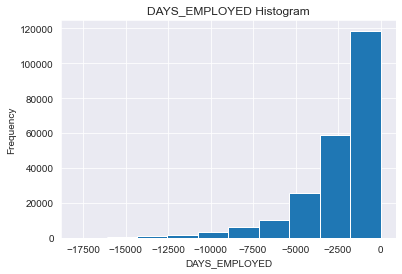

In [58]:
application_train['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYED Histogram')
plt.xlabel('DAYS_EMPLOYED')

**DAYS_REGISTRATION**

Text(0.5, 0, 'DAYS_REGISTRATION')

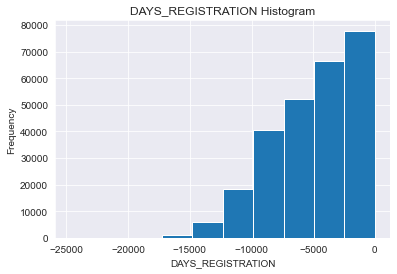

In [59]:
application_train['DAYS_REGISTRATION'].plot.hist(title = 'DAYS_REGISTRATION Histogram')
plt.xlabel('DAYS_REGISTRATION')

**--> à priori pas de valeurs abérrantes**

**DAYS_ID_PUBLISH**

Text(0.5, 0, 'DAYS_ID_PUBLISH')

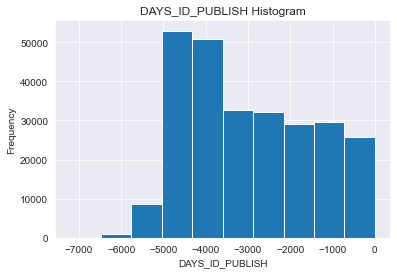

In [60]:
application_train['DAYS_ID_PUBLISH'].plot.hist(title = 'DAYS_ID_PUBLISH Histogram')
plt.xlabel('DAYS_ID_PUBLISH')

**--> à priori pas de valeurs abérrantes**

**OBS_30_CNT_SOCIAL_CIRCLE**

Text(0.5, 0, 'OBS_30_CNT_SOCIAL_CIRCLE')

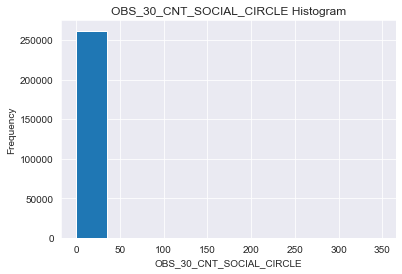

In [61]:
application_train['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_30_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')

In [62]:
application_train[application_train['OBS_30_CNT_SOCIAL_CIRCLE']>300]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
148403,272071,0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,Family,State servant,Higher education,Single / not married,House / apartment,0.020246,-10111,-1917.0,-2306.0,-2306,NaN,1,1,0,1,0,0,Core staff,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,Police,0.360649,0.304506,0.357293,NaN,0.0306,0.9866,0.8164,NaN,0.12,0.0345,0.3333,0.375,NaN,0.0303,0.0235,NaN,NaN,NaN,0.0317,0.9866,0.8236,NaN,0.1208,0.0345,0.3333,0.375,NaN,0.0331,0.0245,NaN,NaN,NaN,0.0306,0.9866,0.8189,NaN,0.12,0.0345,0.3333,0.375,NaN,0.0308,0.0239,NaN,NaN,reg oper account,block of flats,0.0299,Panel,No,348.0,34.0,344.0,24.0,-667.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.0,3.0


**Nous avons visiblement une valeur abérrante ! Nous la remplaçons par NaN :**

In [63]:
application_train['OBS_30_CNT_SOCIAL_CIRCLE'].values[application_train['OBS_30_CNT_SOCIAL_CIRCLE']>300] = np.nan

Text(0.5, 0, 'OBS_30_CNT_SOCIAL_CIRCLE')

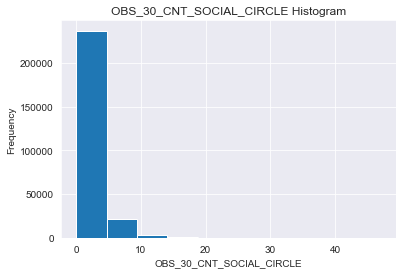

In [64]:
application_train['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_30_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')

**DEF_30_CNT_SOCIAL_CIRCLE**

Text(0.5, 0, 'DEF_30_CNT_SOCIAL_CIRCLE')

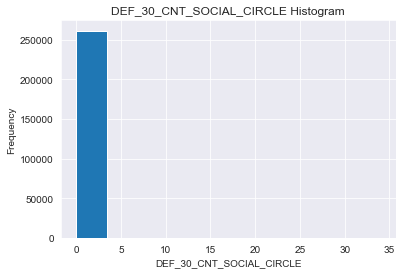

In [65]:
application_train['DEF_30_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'DEF_30_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('DEF_30_CNT_SOCIAL_CIRCLE')

In [66]:
application_train[application_train['DEF_30_CNT_SOCIAL_CIRCLE']>30]['DEF_30_CNT_SOCIAL_CIRCLE']

148403    34.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

**Au vu de l'ordre de grandeur, il s'agit peut-être simplmement d'un outlier. Nous le conservons.**

**OBS_60_CNT_SOCIAL_CIRCLE**

Text(0.5, 0, 'OBS_60_CNT_SOCIAL_CIRCLE')

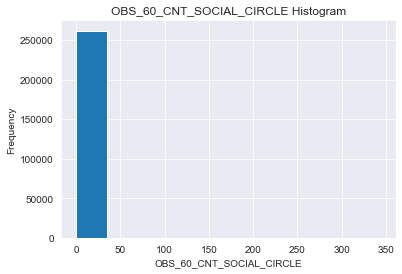

In [67]:
application_train['OBS_60_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_60_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')

In [68]:
application_train[application_train['OBS_60_CNT_SOCIAL_CIRCLE']>300]['OBS_60_CNT_SOCIAL_CIRCLE']

148403    344.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

**Nous avons visiblement une valeur abérrante ! Nous la remplaçons par NaN :**

In [69]:
application_train['OBS_60_CNT_SOCIAL_CIRCLE'].values[application_train['OBS_60_CNT_SOCIAL_CIRCLE']>300] = np.nan

Text(0.5, 0, 'OBS_30_CNT_SOCIAL_CIRCLE')

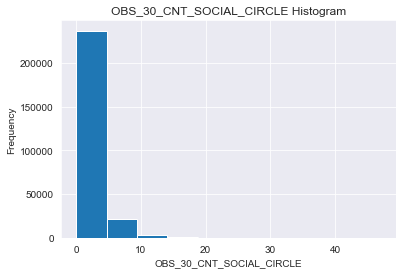

In [70]:
application_train['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'OBS_30_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('OBS_30_CNT_SOCIAL_CIRCLE')

**DEF_60_CNT_SOCIAL_CIRCLE**

Text(0.5, 0, 'DEF_60_CNT_SOCIAL_CIRCLE')

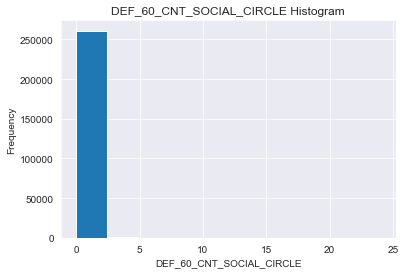

In [71]:
application_train['DEF_60_CNT_SOCIAL_CIRCLE'].plot.hist(title = 'DEF_60_CNT_SOCIAL_CIRCLE Histogram')
plt.xlabel('DEF_60_CNT_SOCIAL_CIRCLE')

In [72]:
application_train[application_train['DEF_60_CNT_SOCIAL_CIRCLE']>20]['DEF_60_CNT_SOCIAL_CIRCLE']

148403    24.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

**Au vu de l'ordre de grandeur, il s'agit peut-être simplement d'un outlier. Nous le conservons.**

**DAYS_LAST_PHONE_CHANGE**

Text(0.5, 0, 'DAYS_LAST_PHONE_CHANGE')

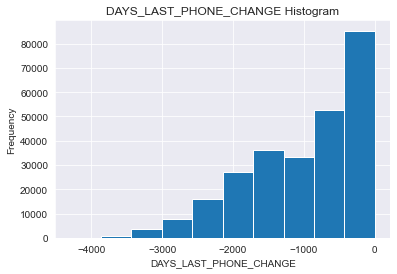

In [73]:
application_train['DAYS_LAST_PHONE_CHANGE'].plot.hist(title = 'DAYS_LAST_PHONE_CHANGE Histogram')
plt.xlabel('DAYS_LAST_PHONE_CHANGE')

**--> à priori pas de valeurs abérrantes**

**AMT_REQ_CREDIT_BUREAU_MON**

Text(0.5, 0, 'AMT_REQ_CREDIT_BUREAU_MON')

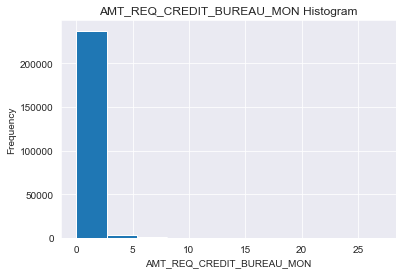

In [74]:
application_train['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(title = 'AMT_REQ_CREDIT_BUREAU_MON Histogram')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_MON')

In [75]:
application_train[application_train['AMT_REQ_CREDIT_BUREAU_MON']>20]['AMT_REQ_CREDIT_BUREAU_MON']

12869     24.0
88209     23.0
253488    27.0
266065    22.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

**Au vu de l'ordre de grandeur, il s'agit peut-être simplement d'outliers. Nous les conservons.**

**AMT_REQ_CREDIT_BUREAU_YEAR**

Text(0.5, 0, 'AMT_REQ_CREDIT_BUREAU_YEAR')

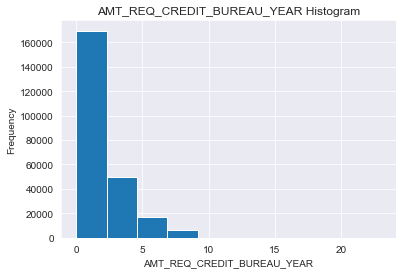

In [76]:
application_train['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(title = 'AMT_REQ_CREDIT_BUREAU_YEAR Histogram')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_YEAR')

In [77]:
application_train[application_train['AMT_REQ_CREDIT_BUREAU_YEAR']>20]['AMT_REQ_CREDIT_BUREAU_YEAR']

29612     23.0
76655     22.0
132792    21.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

**Au vu de l'ordre de grandeur, il s'agit peut-être simplement d'outliers. Nous les conservons.**

In [78]:
application_train = application_train.reset_index(drop=True)

### 4 - Analyses bivariées

**Recherchons les variables numériques corrélées avec "TARGET" :**

In [79]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.030863
DEF_30_CNT_SOCIAL_CIRCLE       0.032263
OWN_CAR_AGE                    0.038698
REG_CITY_NOT_LIVE_CITY         0.039396
DAYS_REGISTRATION              0.039987
FLAG_EMP_PHONE                 0.043431
FLAG_DOCUMENT_3                0.045488
REG_CITY_NOT_WORK_CITY         0.045511
DAYS_ID_PUBLISH                0.047345
DAYS_LAST_PHONE_CHANGE         0.051066
REGION_RATING_CLIENT           0.056136
REGION_RATING_CLIENT_W_CITY    0.058300
DAYS_EMPLOYED                  0.072867
DAYS_BIRTH                     0.076206
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178462
EXT_SOURCE_2                 -0.157166
EXT_SOURCE_1                 -0.154505
FLOORSMAX_AVG                -0.044012
FLOORSMAX_MEDI               -0.043777
FLOORSMAX_MODE               -0.043235
AMT_GOODS_PRICE              -0.040232
REGION_POPULATION_RELATIVE   -0.035916


#### a) DAYS_BIRTH

**La variable la plus fortement corrélée positivement à TARGET est DAYS_BIRTH (0.076, ce qui reste très faible !)**  
**Nous allons observer la répartition de l'âge des clients (en prenant la valeur absolue de DAY_BIRTH et en divisant par 365)**

Text(0, 0.5, 'Count')

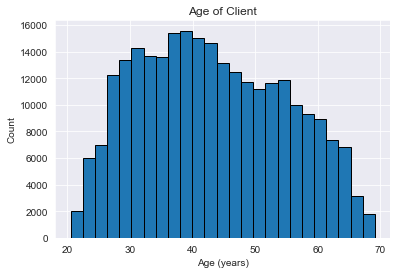

In [80]:
# Plot the distribution of ages in years
plt.hist(abs(application_train['DAYS_BIRTH']) / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

**Observons la probabilité de ne pas rembourser le prêt en fonction de la catégorie d'âge :**

In [81]:
# Age information into a separate dataframe
age_data = abs(application_train[['TARGET', 'DAYS_BIRTH']])
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(5)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,16941,46.413699,"(45.0, 50.0]"
4,0,13778,37.747945,"(35.0, 40.0]"


In [82]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.118698,8544.138964,23.408600
"(25.0, 30.0]",0.107360,10161.426022,27.839523
"(30.0, 35.0]",0.097431,11855.078771,32.479668
"(35.0, 40.0]",0.085935,13708.048823,37.556298
"(40.0, 45.0]",0.075026,15496.353507,42.455763
"(45.0, 50.0]",0.071454,17323.585991,47.461879
"(50.0, 55.0]",0.063696,19190.283416,52.576119
"(55.0, 60.0]",0.051766,20973.990319,57.462987
"(60.0, 65.0]",0.049294,22773.648656,62.393558


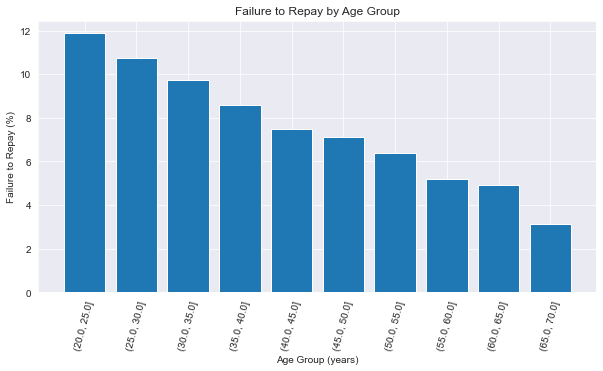

In [83]:
plt.figure(figsize = (10, 5))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

**--> on remarque que les clients les plus jeunes ont plus de probabilité de ne pas rembourser le prêt !! Cette variable a donc bel et bien de l'influence sur notre target**

#### b) DAYS_EMPLOYED

In [84]:
# Age information into a separate dataframe
employment_data = abs(application_train[['TARGET', 'DAYS_EMPLOYED']])
employment_data['YEARS_EMPLOYMENT'] = employment_data['DAYS_EMPLOYED'] / 365

# Bin the age data
employment_data['YEARS_BINNED'] = pd.cut(employment_data['YEARS_EMPLOYMENT'], bins = np.linspace(0, 50, num = 11))
employment_data.head(5)

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYMENT,YEARS_BINNED
0,1,637.0,1.745205,"(0.0, 5.0]"
1,0,1188.0,3.254795,"(0.0, 5.0]"
2,0,225.0,0.616438,"(0.0, 5.0]"
3,0,1588.0,4.350685,"(0.0, 5.0]"
4,0,3130.0,8.575342,"(5.0, 10.0]"


In [85]:
# Group by the bin and calculate averages
employment_groups  = employment_data.groupby('YEARS_BINNED').mean()
employment_groups

,TARGET,DAYS_EMPLOYED,YEARS_EMPLOYMENT
YEARS_BINNED,,,
"(0.0, 5.0]",0.101127,866.742979,2.374638
"(5.0, 10.0]",0.071173,2632.965591,7.213604
"(10.0, 15.0]",0.055835,4466.539676,12.237095
"(15.0, 20.0]",0.047442,6308.032798,17.282282
"(20.0, 25.0]",0.046872,8092.698205,22.171776
"(25.0, 30.0]",0.037414,9964.497539,27.299993
"(30.0, 35.0]",0.039182,11790.546848,32.302868
"(35.0, 40.0]",0.018253,13521.940026,37.046411
"(40.0, 45.0]",0.005181,15320.165803,41.973057


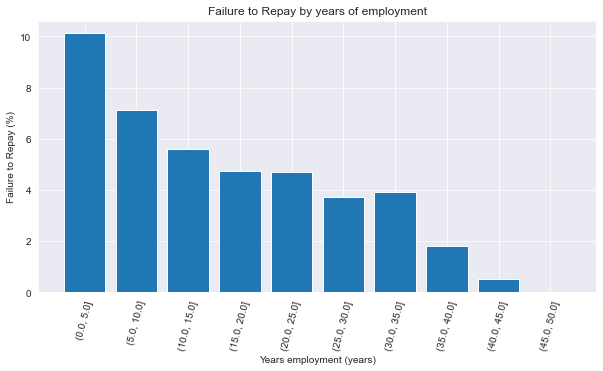

In [86]:
plt.figure(figsize = (10, 5))

# Graph the age bins and the average of the target as a bar plot
plt.bar(employment_groups.index.astype(str), 100 * employment_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Years employment (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by years of employment');

**--> logiquement avec la conclusion précédente sur l'âge, on remarque que les clients qui travaillent depuis moins longtemps ont plus de probabilité de ne pas rembourser le prêt. Cette variable a donc bel et bien de l'influence sur notre target**

#### c) EXT_SOURCE_1 - EXT_SOURCE_2 - EXT_SOURCE_3

**Ces 3 variables sont les plus corrélées négativement à TARGET. Nous allons d'abord afficher les graphiques KDE en séparant par target 0/1 :**

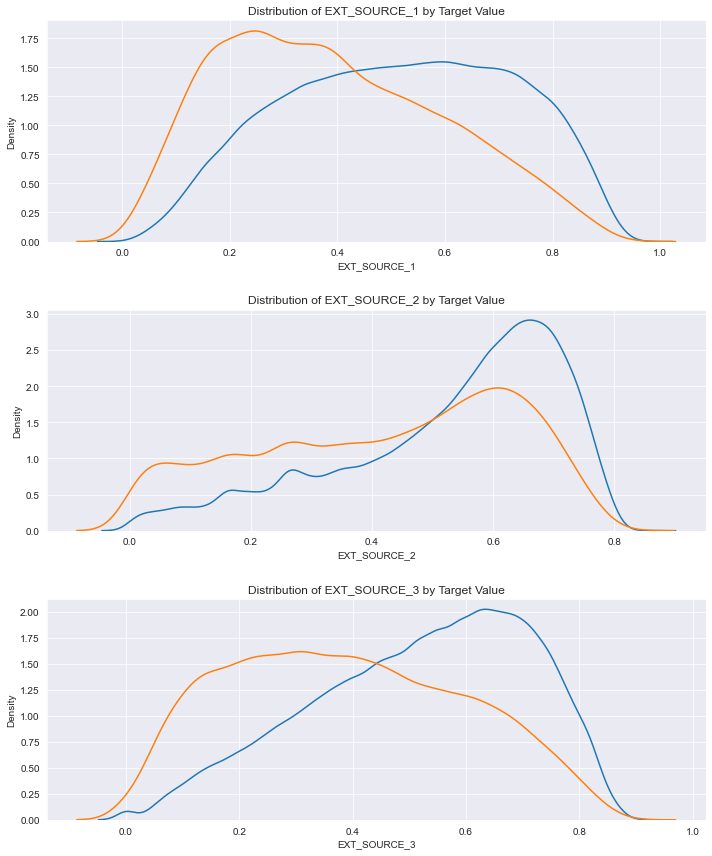

In [87]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

**--> EXT_SOURCE_3 présente en effet 2 distributions distinctes pour target 0 et 1, mêmes si les courbes se chevauchent. C'est aussi le cas pour EXT_SOURCE_1 dans une moindre mesure, et ce n'est manifestement pas le cas pour EXT_SOURCE_2**

#### d) Matrice de corrélations avec ces variables

**On utilisera les valeurs absolues de DAYS_BIRTH et DAYS_EMPLOYED**

In [88]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED']].copy()
ext_data.loc[:, 'DAYS_BIRTH'] = abs(ext_data['DAYS_BIRTH'])
ext_data.loc[:, 'DAYS_EMPLOYED'] = abs(ext_data['DAYS_EMPLOYED'])
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,-0.154505,-0.157166,-0.178462,-0.076206,-0.072867
EXT_SOURCE_1,-0.154505,1.000000,0.210731,0.186940,0.595986,0.249258
EXT_SOURCE_2,-0.157166,0.210731,1.000000,0.112663,0.109354,0.090837
EXT_SOURCE_3,-0.178462,0.186940,0.112663,1.000000,0.201805,0.129881
DAYS_BIRTH,-0.076206,0.595986,0.109354,0.201805,1.000000,0.351486
DAYS_EMPLOYED,-0.072867,0.249258,0.090837,0.129881,0.351486,1.000000


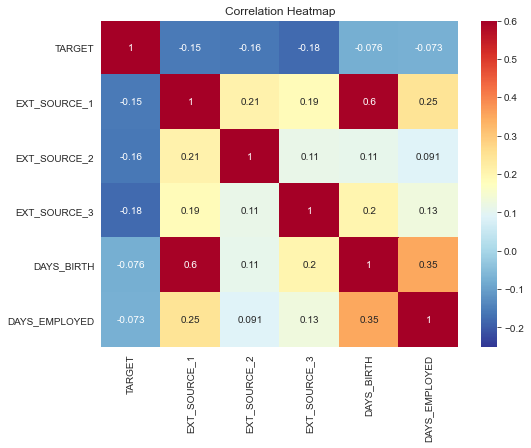

In [89]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

**--> On remarque que DAYS_BIRTH, passé en valeur absolue, est corrélé à EXT_SOURCE_1 avec un coefficient de 0,6. Cette variable opaque prend très probablement en compte l'âge des emprunteurs.  
DAYS_EMPLOYED est également très modérémment corrélé à DAYS_BIRTH (0,25), ce qui est logique puisque plus quelqu'un est âgé, plus il a de chances d'avoir une longue carrière professionnelle**

#### e) Variables catégorielles : test du Chi²

**Nous allons tester si les variables catégorielles sont à priori indépendantes de TARGET :**

In [90]:
from scipy.stats import chi2_contingency

p_value = []

for i in var_cat:
    contigency_pct = pd.crosstab(application_train[i], application_train['TARGET'], normalize='all')
    c, p, dof, expected = chi2_contingency(contigency_pct)
    p_value.append(p) 

**L'hypothèse nulle est que les 2 variables sont indépendantes. Si p > 0,05 on accepte l'hypothèse nulle :**

In [91]:
chi2 = pd.DataFrame(list(zip(var_cat, p_value)), columns =['variable', 'p_value']).sort_values('p_value').reset_index(drop=True)
chi2['independancy'] = np.where(chi2['p_value']>=0.05, 'yes', 'no')

In [92]:
chi2

,variable,p_value,independancy
0,EMERGENCYSTATE_MODE,1.123880e-60,no
1,NAME_CONTRACT_TYPE,3.635249e-10,no
2,FLAG_OWN_REALTY,5.688468e-05,no
3,FLAG_OWN_CAR,1.262045e-04,no
4,CODE_GENDER,9.986933e-01,yes
5,HOUSETYPE_MODE,9.999096e-01,yes
6,NAME_EDUCATION_TYPE,9.999986e-01,yes
7,FONDKAPREMONT_MODE,9.999994e-01,yes
8,NAME_FAMILY_STATUS,1.000000e+00,yes
9,NAME_HOUSING_TYPE,1.000000e+00,yes


**Conclusion des analyses bivariées :**

**--> On en déduit que les variables numériques :  
DAYS_BIRTH  
DAYS_EMPLOYED  
EXT_SOURCE_1  
EXT_SOURCE_2  
EXT_SOURCE_3**  

**et les variables catégorielles:  
EMERGENCYSTATE_MODE  
NAME_CONTRACT_TYPE  
FLAG_OWN_REALTY  
FLAG_OWN_CAR**  

**Sont à priori dépendantes de TARGET**

---------------------

## <center>4) Baseline</center>

**Nous allons créer une baseline simple avec un rapide feature engineering sur les variables visiblement dépendante de TARGET :**

In [134]:
var_num_selec = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
var_cat_selec = ['EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR']

In [136]:
data = application_train.copy()
data = data[var_num_selec+var_cat_selec]

,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR
0,-9461,-637.0,0.083037,0.262949,0.139376,No,Cash loans,Y,N
1,-16765,-1188.0,0.311267,0.622246,NaN,No,Cash loans,N,N
2,-19046,-225.0,NaN,0.555912,0.729567,NaN,Revolving loans,Y,Y
3,-16941,-1588.0,NaN,0.354225,0.621226,NaN,Cash loans,Y,N
4,-13778,-3130.0,0.774761,0.724000,0.492060,NaN,Cash loans,Y,Y


**On passe les variables DAYS_BIRTH et DAYS_EMPLOYED en valeur absolue :**

In [137]:
data.loc[:, 'DAYS_BIRTH'] = abs(data.loc[:, 'DAYS_BIRTH'])
data.loc[:, 'DAYS_EMPLOYED'] = abs(data.loc[:, 'DAYS_EMPLOYED'])

In [138]:
data.head(5)

,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR
0,9461,637.0,0.083037,0.262949,0.139376,No,Cash loans,Y,N
1,16765,1188.0,0.311267,0.622246,NaN,No,Cash loans,N,N
2,19046,225.0,NaN,0.555912,0.729567,NaN,Revolving loans,Y,Y
3,16941,1588.0,NaN,0.354225,0.621226,NaN,Cash loans,Y,N
4,13778,3130.0,0.774761,0.724000,0.492060,NaN,Cash loans,Y,Y


**Feature engineering :**

In [155]:
y = application_train['TARGET']

from sklearn.model_selection import train_test_split

data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y, random_state=0)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

data_train_num = data_train[var_num_selec]
data_test_num = data_test[var_num_selec]

data_train_num = pd.DataFrame(imputer.fit_transform(data_train_num), columns = var_num_selec).reset_index(drop=True)
data_test_num =  pd.DataFrame(imputer.transform(data_test_num), columns = var_num_selec).reset_index(drop=True)

data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

for i in var_num_selec:
    data_train[i] = data_train_num[i]
    data_test[i] = data_test_num[i]

data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

print(data_train.columns.symmetric_difference(data_test.columns))

Index([], dtype='object')


**Modélisation et score :**

In [172]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)

start_time = time.time()

rfc.fit(data_train, y_train)
y_pred = rfc.predict(data_test)
y_prob = rfc.predict_proba(data_test)[:,1]

exec_time = time.time() - start_time

print('Classifieur :', rfc)
print('-------')

print('Testing set accuracy : ', round(metrics.accuracy_score(y_test, y_pred),3))
print('ROC AUC Score : ', round(metrics.roc_auc_score(y_test, y_prob),3))
print('F1 Score : ', round(metrics.f1_score(y_test, y_pred),3))
print('-------')

print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))

Classifieur : RandomForestClassifier()
-------
Testing set accuracy :  0.921
ROC AUC Score :  0.689
F1 Score :  0.035
-------
Temps d'exécution : - 5.1e+01 seconds -


**Matrice de confusion :**

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

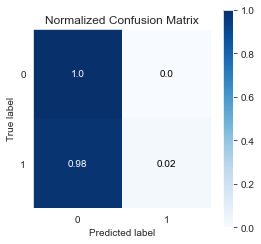

In [191]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(4,4), normalize='All')

**Courbe ROC :**

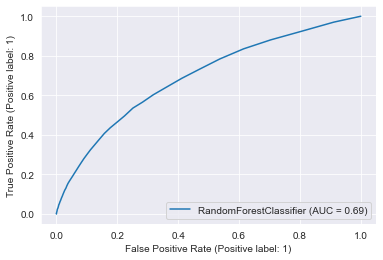

In [171]:
metrics.plot_roc_curve(rfc, data_test, y_test) 

Text(0.5, 1.0, 'Baseline (RandomForest) ROC Curve')

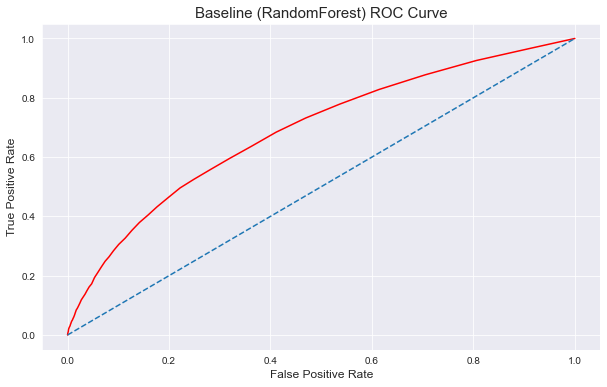

In [174]:
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_prob) # on compare les données test avec les données prédites

fig = plt.figure(figsize=(10, 6))

plt.plot(fpr, tpr, color='red') # taux de vrais positifs en fonction du taux de faux positifs
plt.plot([0,1], [0,1], linestyle='--') # classifieur aléatoire
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Baseline (RandomForest) ROC Curve', fontsize=15)

**On va maintenant utiliser le feature_importance :**

In [197]:
feature_importance_values_domain = rfc.feature_importances_

In [198]:
L_name_y = []
L_importance_y = []

for name, importance in zip(data_train.columns, rfc.feature_importances_):
    L_name_y.append(name)
    L_importance_y.append(importance)

features_y = pd.DataFrame(L_name_y, L_importance_y)
features_y['Importance_y'] = features_y.index
features_y.columns.values[0] = "Features"
features_y = features_y.sort_values('Importance_y', ascending=False).reset_index(drop=True)

In [199]:
features_y

,Features,Importance_y
0,EXT_SOURCE_2,0.237716
1,DAYS_BIRTH,0.215108
2,DAYS_EMPLOYED,0.194013
3,EXT_SOURCE_3,0.190674
4,EXT_SOURCE_1,0.120950
5,EMERGENCYSTATE_MODE_No,0.011724
6,FLAG_OWN_REALTY_N,0.006976
7,FLAG_OWN_REALTY_Y,0.006856
8,FLAG_OWN_CAR_N,0.004639
9,FLAG_OWN_CAR_Y,0.004380


**Bilan Baseline :**

**--> On remarque un très bon taux d'accuracy (0,921) mais un score AUC peu satisfaisant (0,69). C'est normal, car avec une TARGET très déséquilibrée (7,8% de 1 - 92,2% de 0), il suffit que notre classifieur ne prédise que des 0 pour avoir une bonne accuracy !**  
**De plus, par rapport à notre problématique : nous préférons avoir des faux-positifs plutôt que des faux négatifs. Or la matrice de confusion nous indique que notre classifieur privilégie l'inverse.**
**Cette baseline n'est donc pas convaincante**

---------------------------

## <center>4) Feature engineering</center>

**Nous allons commencer nos modélisations avec les variables visiblement dépendantes de TARGET ainsi des déclinaisons polynomiales de celles-ci**

In [ ]:
def parametrage():
    

### 1 - SéparationTrain / Test

**Afin d'éviter la fuite de données, nous effectuons une séparation train / test avant le feature engineering**

In [200]:
y = application_train['TARGET']

In [201]:
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y, random_state=0)

In [202]:
train_indexes = data_train.index
test_indexes = data_test.index

### 2 - Imputation des manquants

In [203]:
column = []
isna = []
types = []

for i in data.columns:
    types.append(data[i].dtypes)
    column.append(i)
    isna.append(round(data.loc[:, i].isna().mean()*100,2))

pd.DataFrame(list(zip(column, types, isna)), columns =['column', 'Type', '% NaN']).sort_values('% NaN', ascending=False)

,column,Type,% NaN
2,EXT_SOURCE_1,float64,52.28
5,EMERGENCYSTATE_MODE,object,38.53
1,DAYS_EMPLOYED,float64,13.95
4,EXT_SOURCE_3,float64,13.21
3,EXT_SOURCE_2,float64,0.15
0,DAYS_BIRTH,int64,0.00
6,NAME_CONTRACT_TYPE,object,0.00
7,FLAG_OWN_REALTY,object,0.00
8,FLAG_OWN_CAR,object,0.00


**On va commencer par EMERGENCYSTATE_MODE :**

In [204]:
data['EMERGENCYSTATE_MODE'].value_counts()

No     158918
Yes      2325
Name: EMERGENCYSTATE_MODE, dtype: int64

**Les valeurs prises sont "No" et "Yes". Puisqu'on passer les variables catégorielles en One-Hot, l'absence d'information sera traduite par 0 - 0 --> nous n'imputons pas les manquants.**

**Variables numériques : imputation par IterativeImputer + imputation par KNN**

In [205]:
data_train_num = data_train[var_num_selec]
data_test_num = data_test[var_num_selec]

In [206]:
data_train_num.shape

(209860, 5)

In [207]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

start_time = time.time()

imputer = IterativeImputer(initial_strategy='median', random_state=0)
imputer.fit(data_train_num)

# train
data_temp_train = imputer.transform(data_train_num)
data_temp_train = pd.DataFrame(data_temp_train).set_index(train_indexes)
data_temp_train.columns = data_train_num.columns

# test
imputer.fit(data_test_num)
data_temp_test = imputer.transform(data_test_num)
data_temp_test = pd.DataFrame(data_temp_test).set_index(test_indexes)
data_temp_test.columns = data_test_num.columns

exec_time = time.time() - start_time
print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))

Temps d'exécution : - 2.7 seconds -


In [208]:
for i in data_temp_train.columns:
    data_train.loc[:, i] = data_temp_train[i]
    data_test.loc[:, i] = data_temp_test[i]

C:\Users\marti\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### 3 - Variables polynomiales

In [209]:
from sklearn.preprocessing import PolynomialFeatures

poly_train = data_train[var_num_selec]
poly_test = data_test[var_num_selec]

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_train)

PolynomialFeatures(degree=3)

In [210]:
# Transform the features
poly_train = poly_transformer.transform(poly_train)
poly_test = poly_transformer.transform(poly_test)

In [211]:
print(poly_train.shape)
print(poly_test.shape)

(209860, 56)
(52465, 56)


In [212]:
columns = poly_transformer.get_feature_names(input_features = data_train.columns)

In [213]:
poly_train = pd.DataFrame(poly_train, columns=columns).set_index(train_indexes).drop(columns='1')
poly_test = pd.DataFrame(poly_test, columns=columns).set_index(test_indexes).drop(columns='1')

In [214]:
data_train = data_train[var_cat_selec].join(poly_train)
data_test = data_test[var_cat_selec].join(poly_test)

In [215]:
print(data_train.shape)
print(data_test.shape)

(209860, 59)
(52465, 59)


In [216]:
var_num_selec = data_train.columns.symmetric_difference(var_cat_selec)

In [217]:
var_num_selec

Index(['DAYS_BIRTH', 'DAYS_BIRTH DAYS_EMPLOYED',
       'DAYS_BIRTH DAYS_EMPLOYED EXT_SOURCE_1',
       'DAYS_BIRTH DAYS_EMPLOYED EXT_SOURCE_2',
       'DAYS_BIRTH DAYS_EMPLOYED EXT_SOURCE_3', 'DAYS_BIRTH DAYS_EMPLOYED^2',
       'DAYS_BIRTH EXT_SOURCE_1', 'DAYS_BIRTH EXT_SOURCE_1 EXT_SOURCE_2',
       'DAYS_BIRTH EXT_SOURCE_1 EXT_SOURCE_3', 'DAYS_BIRTH EXT_SOURCE_1^2',
       'DAYS_BIRTH EXT_SOURCE_2', 'DAYS_BIRTH EXT_SOURCE_2 EXT_SOURCE_3',
       'DAYS_BIRTH EXT_SOURCE_2^2', 'DAYS_BIRTH EXT_SOURCE_3',
       'DAYS_BIRTH EXT_SOURCE_3^2', 'DAYS_BIRTH^2',
       'DAYS_BIRTH^2 DAYS_EMPLOYED', 'DAYS_BIRTH^2 EXT_SOURCE_1',
       'DAYS_BIRTH^2 EXT_SOURCE_2', 'DAYS_BIRTH^2 EXT_SOURCE_3',
       'DAYS_BIRTH^3', 'DAYS_EMPLOYED', 'DAYS_EMPLOYED EXT_SOURCE_1',
       'DAYS_EMPLOYED EXT_SOURCE_1 EXT_SOURCE_2',
       'DAYS_EMPLOYED EXT_SOURCE_1 EXT_SOURCE_3',
       'DAYS_EMPLOYED EXT_SOURCE_1^2', 'DAYS_EMPLOYED EXT_SOURCE_2',
       'DAYS_EMPLOYED EXT_SOURCE_2 EXT_SOURCE_3',
       'DAYS_EMPLO

### 4 - Passage au logarithme - ln(x+1)

**Quelles variables seraient à passer au logarithme ?**

**On ne va l'observer que pour data_train et on appliquera éventuellement ln(x+1) :**

In [218]:
len(var_num_selec)

55

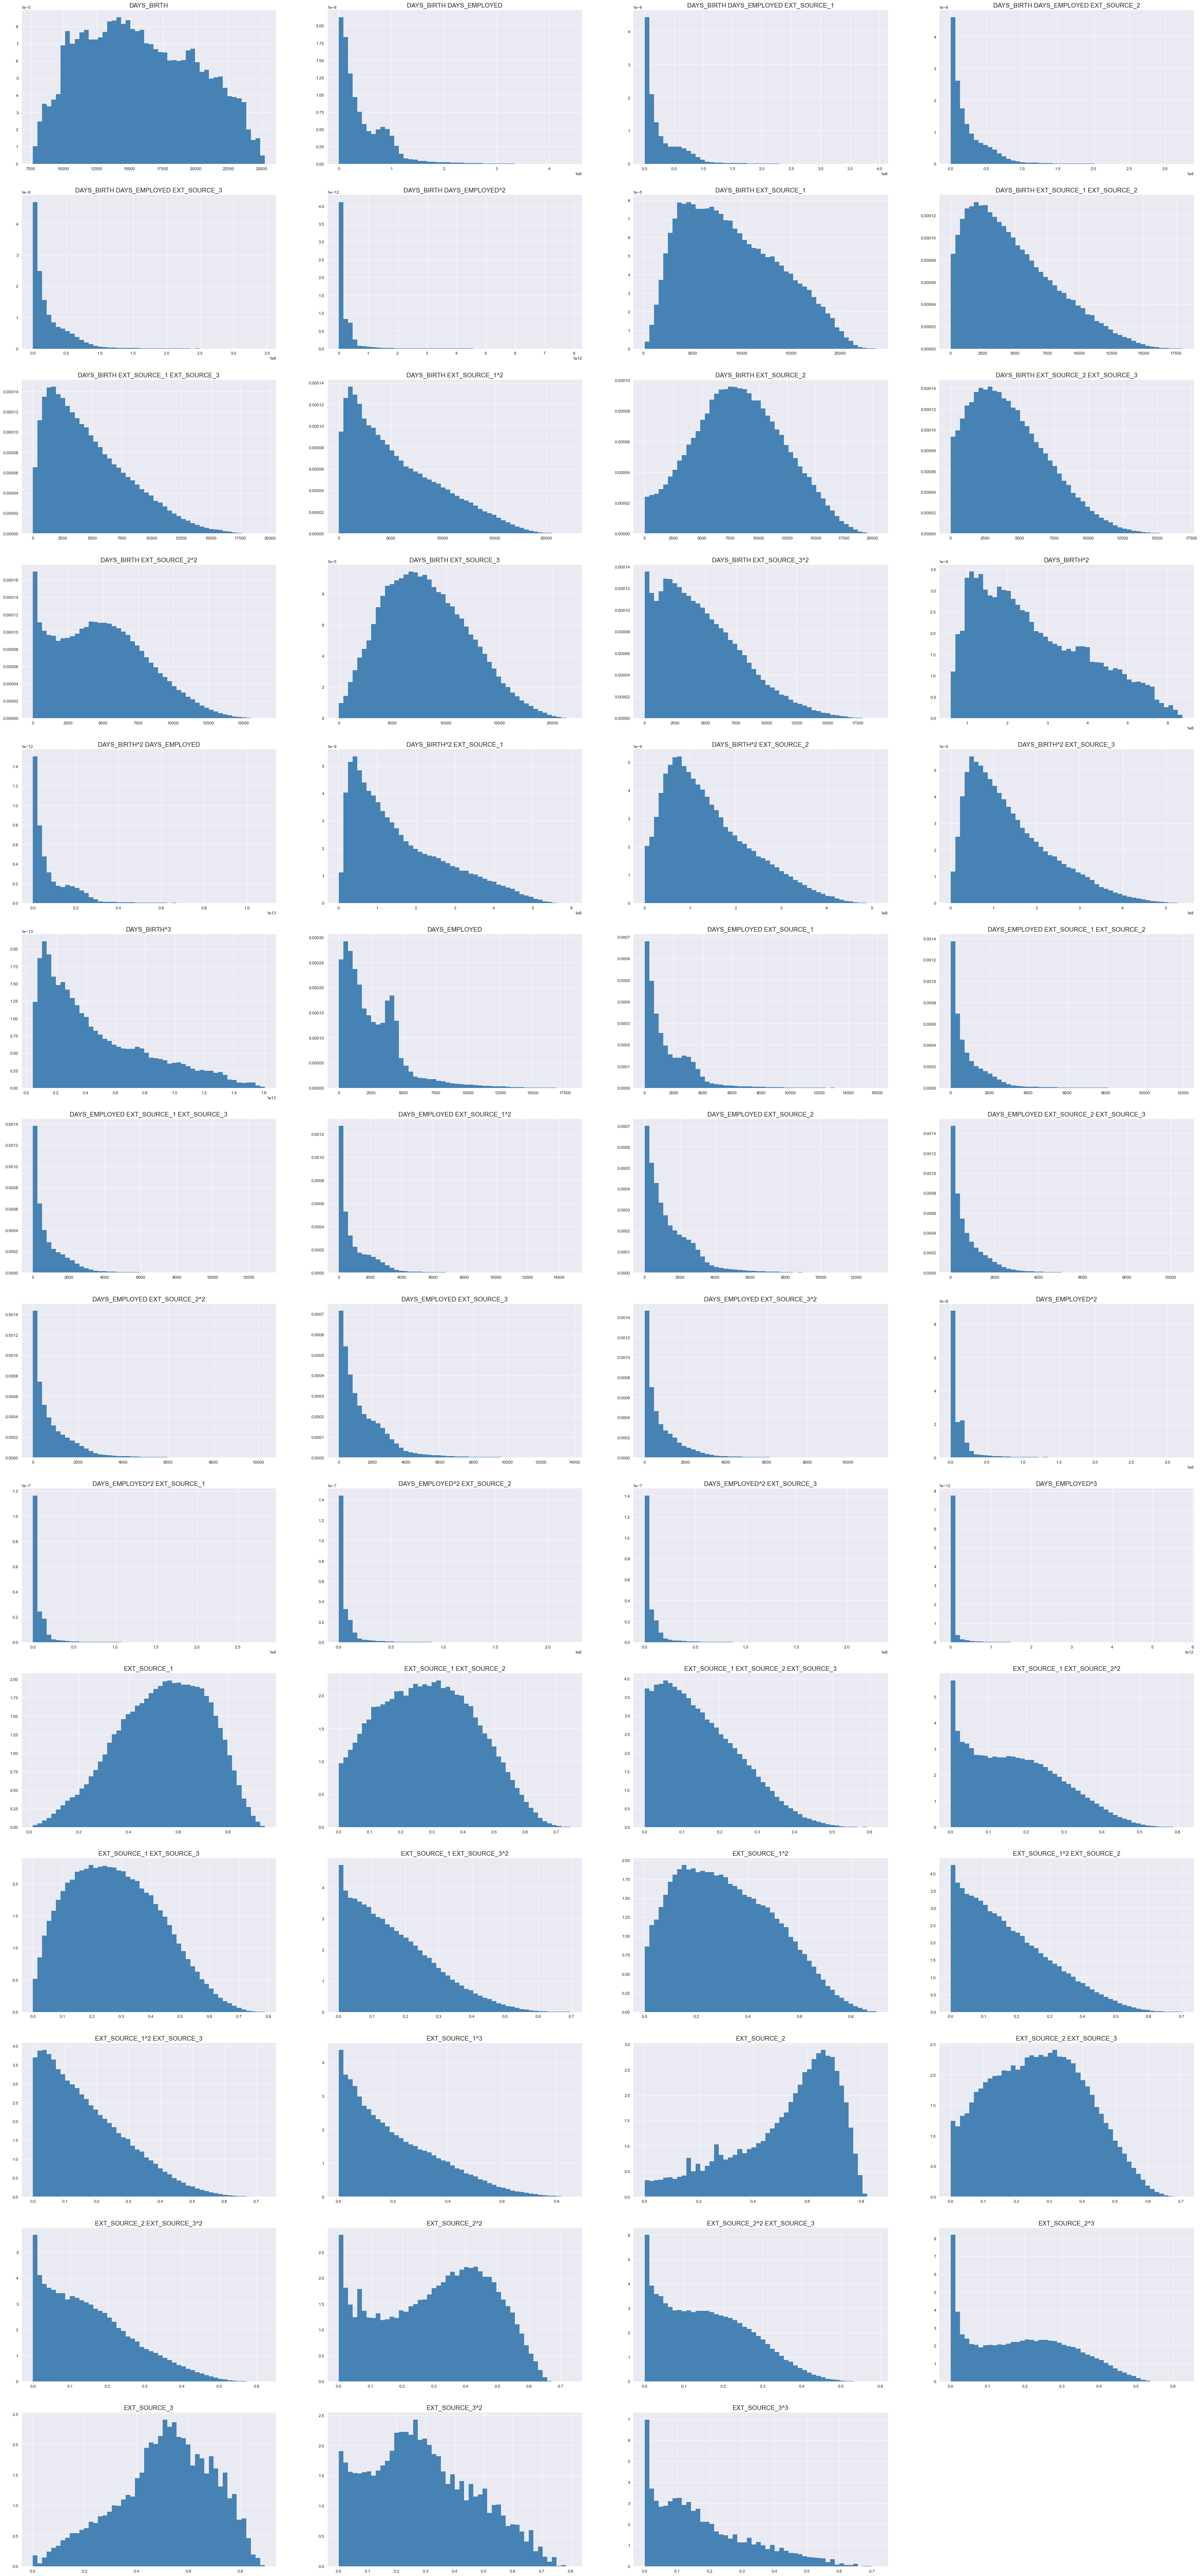

In [219]:
data_num_values = data_train[var_num_selec].values

fig = plt.figure(figsize=(50, 120))
for feat_idx in range(data_num_values.shape[1]):
    ax = fig.add_subplot(15,4, (feat_idx+1))
    h = ax.hist(data_num_values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data_train[var_num_selec].columns[feat_idx], fontsize=15)

In [238]:
var_log = []

for i in var_num_selec:
    print('------')
    print(i)
    s = (data_train[i].mean())/(2*data_train[i].std()**3)
    if s <= 1.0e-15:
        var_log.append(i)
    print(s)

------
DAYS_BIRTH
1.0445529998283568e-07
------
DAYS_BIRTH DAYS_EMPLOYED
2.4234134780986867e-16
------
DAYS_BIRTH DAYS_EMPLOYED EXT_SOURCE_1
3.6379944147808026e-16
------
DAYS_BIRTH DAYS_EMPLOYED EXT_SOURCE_2
5.706920272981378e-16
------
DAYS_BIRTH DAYS_EMPLOYED EXT_SOURCE_3
5.38629115898726e-16
------
DAYS_BIRTH DAYS_EMPLOYED^2
1.2277651569810169e-24
------
DAYS_BIRTH EXT_SOURCE_1
3.9874277922262935e-08
------
DAYS_BIRTH EXT_SOURCE_1 EXT_SOURCE_2
6.353699716847504e-08
------
DAYS_BIRTH EXT_SOURCE_1 EXT_SOURCE_3
6.041689948331163e-08
------
DAYS_BIRTH EXT_SOURCE_1^2
3.544848881223094e-08
------
DAYS_BIRTH EXT_SOURCE_2
6.93602404660289e-08
------
DAYS_BIRTH EXT_SOURCE_2 EXT_SOURCE_3
9.822438385715477e-08
------
DAYS_BIRTH EXT_SOURCE_2^2
7.54055677474385e-08
------
DAYS_BIRTH EXT_SOURCE_3
6.418766526932399e-08
------
DAYS_BIRTH EXT_SOURCE_3^2
6.138514099664577e-08
------
DAYS_BIRTH^2
5.092882034220845e-17
------
DAYS_BIRTH^2 DAYS_EMPLOYED
4.603613544205522e-25
------
DAYS_BIRTH^2 EXT_SOU

In [256]:
data_train

,EMERGENCYSTATE_MODE,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,FLAG_OWN_CAR,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH^2,DAYS_BIRTH DAYS_EMPLOYED,DAYS_BIRTH EXT_SOURCE_1,DAYS_BIRTH EXT_SOURCE_2,DAYS_BIRTH EXT_SOURCE_3,DAYS_EMPLOYED^2,DAYS_EMPLOYED EXT_SOURCE_1,DAYS_EMPLOYED EXT_SOURCE_2,DAYS_EMPLOYED EXT_SOURCE_3,EXT_SOURCE_1^2,EXT_SOURCE_1 EXT_SOURCE_2,EXT_SOURCE_1 EXT_SOURCE_3,EXT_SOURCE_2^2,EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_3^2,DAYS_BIRTH^3,DAYS_BIRTH^2 DAYS_EMPLOYED,DAYS_BIRTH^2 EXT_SOURCE_1,DAYS_BIRTH^2 EXT_SOURCE_2,DAYS_BIRTH^2 EXT_SOURCE_3,DAYS_BIRTH DAYS_EMPLOYED^2,DAYS_BIRTH DAYS_EMPLOYED EXT_SOURCE_1,DAYS_BIRTH DAYS_EMPLOYED EXT_SOURCE_2,DAYS_BIRTH DAYS_EMPLOYED EXT_SOURCE_3,DAYS_BIRTH EXT_SOURCE_1^2,DAYS_BIRTH EXT_SOURCE_1 EXT_SOURCE_2,DAYS_BIRTH EXT_SOURCE_1 EXT_SOURCE_3,DAYS_BIRTH EXT_SOURCE_2^2,DAYS_BIRTH EXT_SOURCE_2 EXT_SOURCE_3,DAYS_BIRTH EXT_SOURCE_3^2,DAYS_EMPLOYED^3,DAYS_EMPLOYED^2 EXT_SOURCE_1,DAYS_EMPLOYED^2 EXT_SOURCE_2,DAYS_EMPLOYED^2 EXT_SOURCE_3,DAYS_EMPLOYED EXT_SOURCE_1^2,DAYS_EMPLOYED EXT_SOURCE_1 EXT_SOURCE_2,DAYS_EMPLOYED EXT_SOURCE_1 EXT_SOURCE_3,DAYS_EMPLOYED EXT_SOURCE_2^2,DAYS_EMPLOYED EXT_SOURCE_2 EXT_SOURCE_3,DAYS_EMPLOYED EXT_SOURCE_3^2,EXT_SOURCE_1^3,EXT_SOURCE_1^2 EXT_SOURCE_2,EXT_SOURCE_1^2 EXT_SOURCE_3,EXT_SOURCE_1 EXT_SOURCE_2^2,EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_1 EXT_SOURCE_3^2,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_3^3
213905,No,Cash loans,Y,N,16873.0,1626.000000,0.605768,0.753660,0.593718,284698129.0,2.743550e+07,10221.123944,12716.503877,10017.796839,2.643876e+06,984.978814,1225.451034,965.384796,0.366955,0.456543,0.359655,0.568003,0.447461,0.352501,4.803712e+12,4.629192e+11,1.724610e+08,2.145656e+08,1.690303e+08,4.461012e+10,1.661955e+07,2.067704e+07,1.628894e+07,6191.630100,7703.251482,6068.461040,9583.919330,7550.011992,5947.742162,4.298942e+09,1.601576e+06,1.992583e+06,1.569716e+06,596.668674,742.339057,584.799244,923.573332,727.571831,573.165931,0.222290,0.276559,0.217868,0.344078,0.271058,0.213534,0.428081,0.337234,0.265666,0.209286
215733,No,Cash loans,Y,N,19718.0,2734.826211,0.240255,0.504687,0.445058,388799524.0,5.392530e+07,4737.347803,9951.415817,8775.662716,7.479274e+06,657.055631,1380.230896,1217.157542,0.057722,0.121254,0.106928,0.254709,0.224615,0.198077,7.666349e+12,1.063299e+12,9.341102e+07,1.962220e+08,1.730385e+08,1.474763e+11,1.295582e+07,2.721539e+07,2.399991e+07,1138.171427,2390.877262,2108.396718,5022.348958,4428.961799,3905.682935,2.045452e+10,1.796933e+06,3.774692e+06,3.328714e+06,157.860891,331.607354,292.428168,696.584419,614.283437,541.706261,0.013868,0.029132,0.025690,0.061195,0.053965,0.047589,0.128548,0.113360,0.099967,0.088156
210228,NaN,Revolving loans,Y,Y,15785.0,7659.000000,0.548926,0.627709,0.188490,249166225.0,1.208973e+08,8664.795020,9908.391481,2975.307291,5.866028e+07,4204.223317,4807.625616,1443.641339,0.301320,0.344566,0.103467,0.394019,0.118317,0.035528,3.933089e+12,1.908364e+12,1.367738e+08,1.564040e+08,4.696523e+07,9.259525e+11,6.636367e+07,7.588837e+07,2.278788e+07,4756.330233,5438.972516,1633.223174,6219.589594,1867.628091,560.814284,4.492791e+11,3.220015e+07,3.682160e+07,1.105685e+07,2307.806985,2639.030123,792.452093,3017.791365,906.187111,272.111283,0.165402,0.189141,0.056796,0.216287,0.064947,0.019502,0.247329,0.074268,0.022301,0.006697
143736,No,Cash loans,Y,N,13713.0,5476.000000,0.570901,0.778701,0.683269,188046369.0,7.509239e+07,7828.763228,10678.333270,9369.665485,2.998658e+07,3126.253004,4264.169255,3741.580121,0.325928,0.444561,0.390079,0.606376,0.532062,0.466856,2.578680e+12,1.029742e+12,1.073558e+08,1.464320e+08,1.284862e+08,4.112059e+11,4.287031e+07,5.847455e+07,5.130829e+07,4469.447509,6096.269441,5349.149903,8315.233824,7296.172295,6402.000387,1.642065e+11,1.711936e+07,2.335059e+07,2.048889e+07,1784.780468,2434.417812,2136.071237,3320.514871,2913.573944,2556.505077,0.186072,0.253800,0.222696,0.346181,0.303755,0.266529,0.472186,0.41431

In [265]:
from scipy.stats import skew

var_log = []

for i in var_num_selec:
#     print('------')
#     print(i)
    s = skew(data_train[i])
    if s >= 1.8:
        var_log.append(i)

In [266]:
print(len(var_log))
print(len(var_num_selec))

20
55


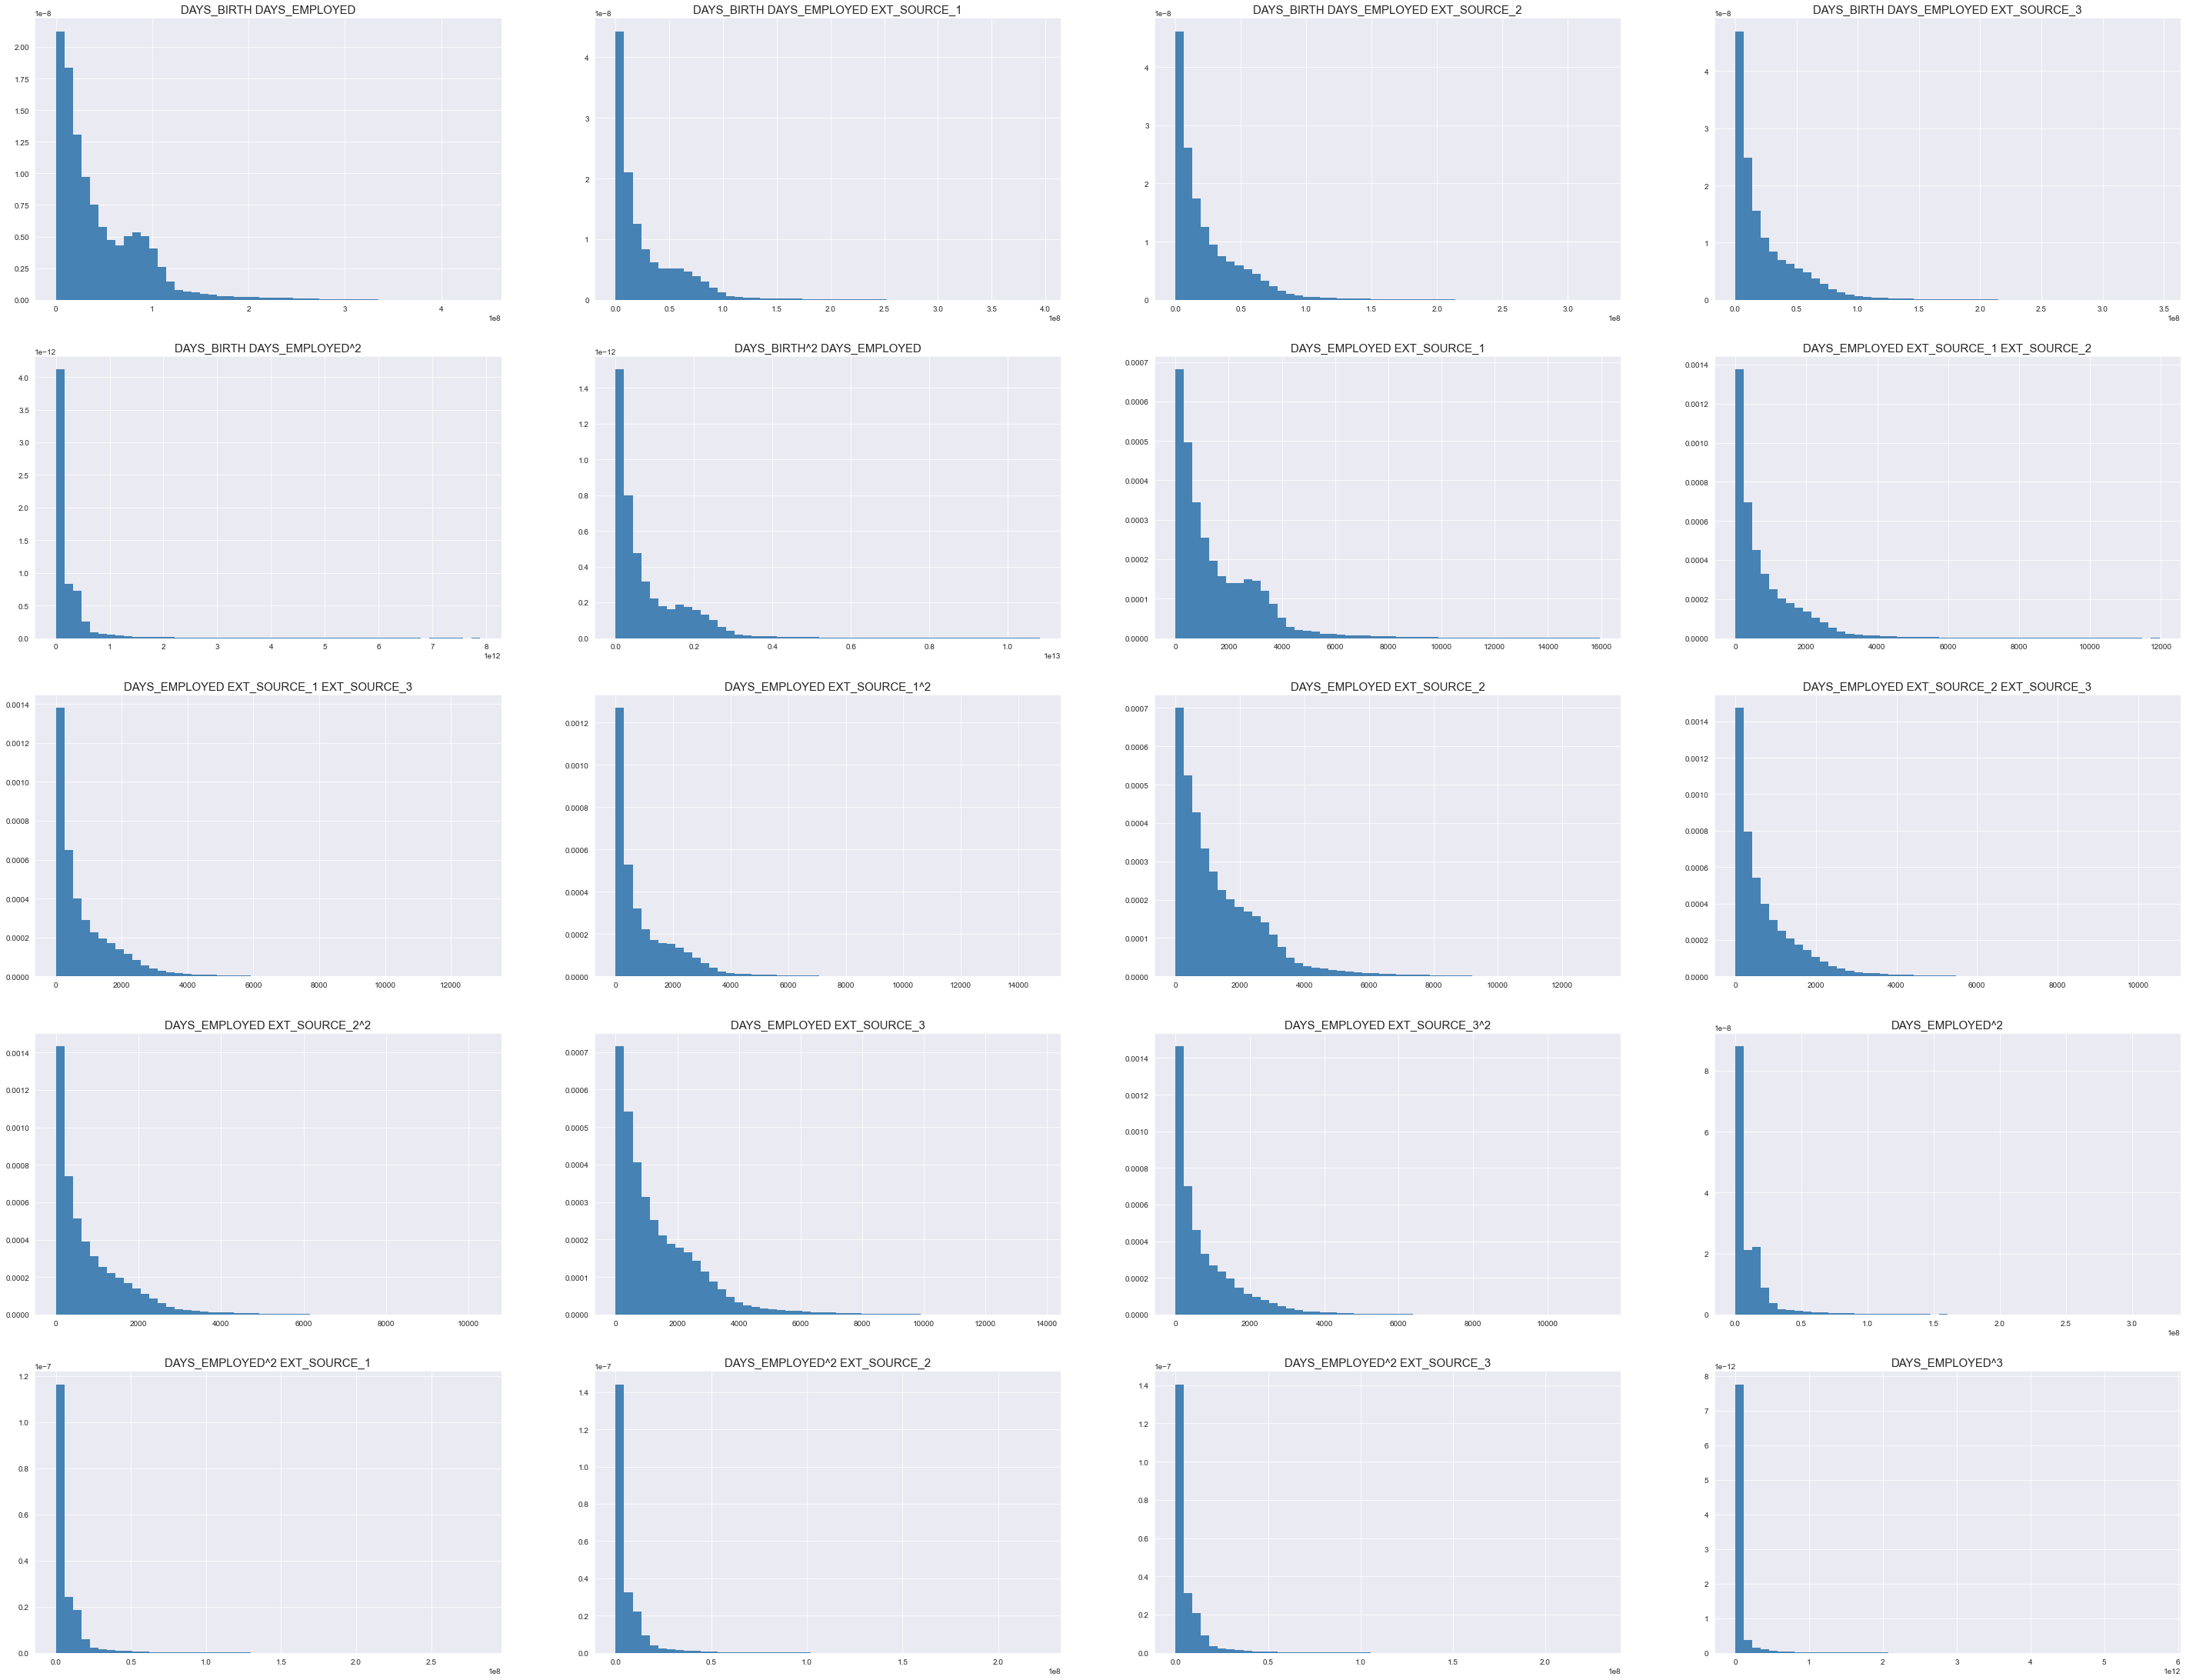

In [267]:
data_num_values = data_train[var_log].values

fig = plt.figure(figsize=(50, 120))
for feat_idx in range(data_num_values.shape[1]):
    ax = fig.add_subplot(15,4, (feat_idx+1))
    h = ax.hist(data_num_values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data_train[var_log].columns[feat_idx], fontsize=15)

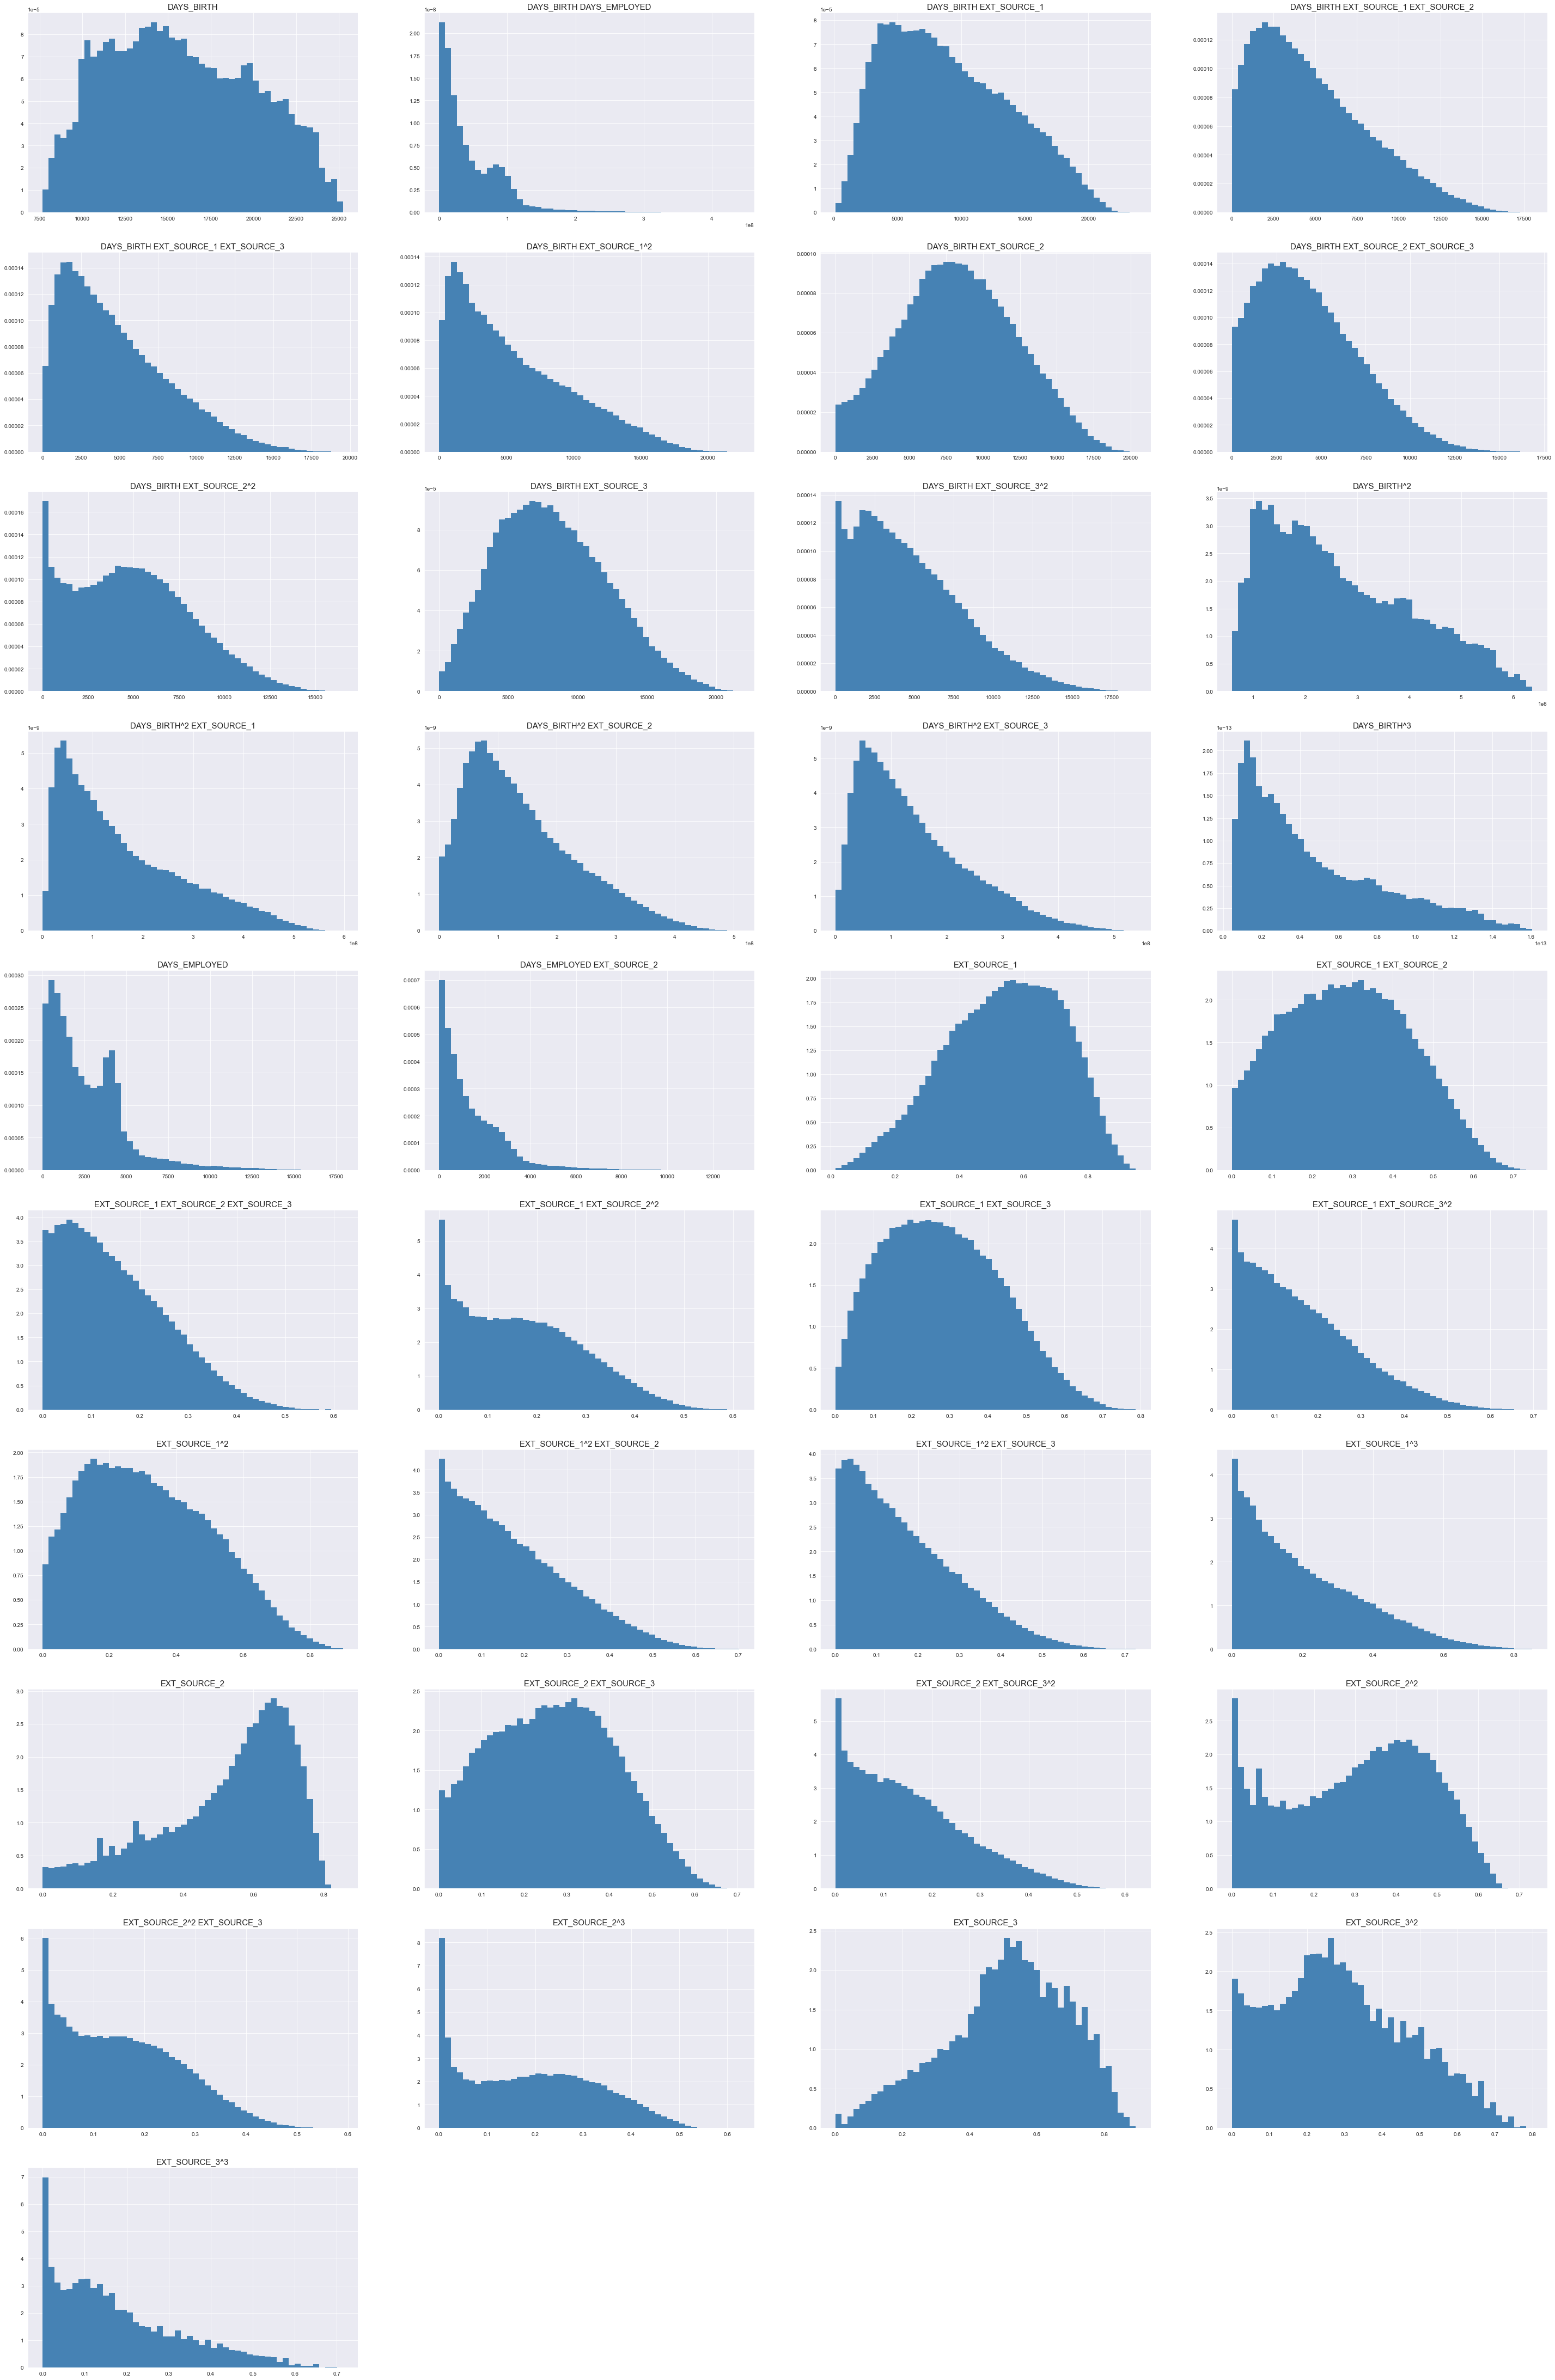

In [264]:
var_non_log = var_num_selec.symmetric_difference(var_log)

data_num_values = data_train[var_non_log].values

fig = plt.figure(figsize=(50, 120))
for feat_idx in range(data_num_values.shape[1]):
    ax = fig.add_subplot(15,4, (feat_idx+1))
    h = ax.hist(data_num_values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(data_train[var_non_log].columns[feat_idx], fontsize=15)

**Seule la variable DAYS_EMPLOYED semble être intéressante à passer au ln(x+1) :**

In [123]:
# data_train.loc[:, 'ln_DAYS_EMPLOYED'] = np.log(data_train['DAYS_EMPLOYED']+1)
# data_test.loc[:, 'ln_DAYS_EMPLOYED'] = np.log(data_test['DAYS_EMPLOYED']+1)
# data_train = data_train.drop(columns = 'DAYS_EMPLOYED')
# data_test = data_test.drop(columns = 'DAYS_EMPLOYED')

# var_num_selec.remove('DAYS_EMPLOYED')
# var_num_selec.append('ln_DAYS_EMPLOYED')

### 3 - Variables catégorielles en one-hot

In [124]:
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [125]:
data_train.columns.symmetric_difference(data_test.columns)

Index([], dtype='object')

**Les colonnes sont les même pour train et test même avec le passage en one-hot : pas besoin d'aligner les DF**

In [126]:
print('data_train :')
print(data_train.isna().mean())
print('--------')
print('data_test :')
print(data_test.isna().mean())

data_train :
DAYS_BIRTH                                 0.0
DAYS_EMPLOYED                              0.0
EXT_SOURCE_1                               0.0
EXT_SOURCE_2                               0.0
EXT_SOURCE_3                               0.0
DAYS_BIRTH^2                               0.0
DAYS_BIRTH DAYS_EMPLOYED                   0.0
DAYS_BIRTH EXT_SOURCE_1                    0.0
DAYS_BIRTH EXT_SOURCE_2                    0.0
DAYS_BIRTH EXT_SOURCE_3                    0.0
DAYS_EMPLOYED^2                            0.0
DAYS_EMPLOYED EXT_SOURCE_1                 0.0
DAYS_EMPLOYED EXT_SOURCE_2                 0.0
DAYS_EMPLOYED EXT_SOURCE_3                 0.0
EXT_SOURCE_1^2                             0.0
EXT_SOURCE_1 EXT_SOURCE_2                  0.0
EXT_SOURCE_1 EXT_SOURCE_3                  0.0
EXT_SOURCE_2^2                             0.0
EXT_SOURCE_2 EXT_SOURCE_3                  0.0
EXT_SOURCE_3^2                             0.0
DAYS_BIRTH^3                               0.0


### 4 - StandardScaler

In [127]:
from sklearn import preprocessing

columns_data = data_train.columns

std_scale = preprocessing.StandardScaler().fit(data_train)
data_train = std_scale.transform(data_train)
data_test =std_scale.transform(data_test)

-----------------------------------

## <center>5) Modélisation</center>

In [128]:
nb_estimators = 15

In [129]:
rfc = RandomForestClassifier(n_estimators = nb_estimators)

start_time = time.time()

rfc.fit(data_train, y_train)
y_pred = rfc.predict(data_test)

exec_time = time.time() - start_time

print('Classifieur :', rfc)
print('-------')

print('Training set accuracy : ', round(metrics.accuracy_score(rfc.predict(data_train), y_train),3))
print('Testing set accuracy : ', round(metrics.accuracy_score(y_test, y_pred),3))
print('ROC AUC score : ', round(metrics.roc_auc_score(y_test, y_pred),3))

print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))

Classifieur : RandomForestClassifier(n_estimators=15)
-------
Training set accuracy :  0.994
Testing set accuracy :  0.918
ROC AUC score :  0.512
Temps d'exécution : - 5e+01 seconds -


In [130]:
y_test

197300    0
60790     0
140261    0
259373    0
151717    0
         ..
77670     0
125473    0
144264    0
198474    0
10216     0
Name: TARGET, Length: 52465, dtype: int64

In [131]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
pd.DataFrame(y_test, y_prob, y_pred)

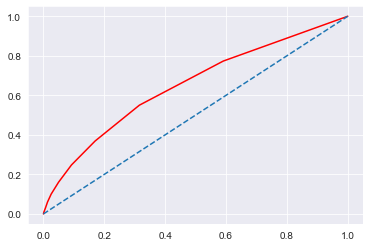

In [133]:
y_prob = rfc.predict_proba(data_test)[:,1] # on récupère seulement la 1ère colonne
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_prob) # on compare les données test avec les données prédites
plt.plot(fpr, tpr, color='red') # taux de vrais positifs en fonction du taux de faux positifs
plt.plot([0,1], [0,1], linestyle='--') # classifieur aléatoire

In [ ]:
raise SystemExit('STOP')

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')

start_time = time.time()

lr.fit(data_train, y_train)
y_pred = lr.predict(data_test)

exec_time = time.time() - start_time

print('Avec X_train_ii :')
print('-------')

print('Training set accuracy : ', round(metrics.accuracy_score(lr.predict(data_train), y_train),3))
print('Testing set accuracy : ', round(metrics.accuracy_score(y_test, y_pred),3))
print('ROC AUC score : ', round(metrics.roc_auc_score(y_test, y_pred),3))

print("Temps d'exécution : - %s seconds -" % "{:.2}".format(exec_time))

In [ ]:
plt.plot(fpr, tpr, color='red') # taux de vrais positifs en fonction du taux de faux positifs
plt.plot([0,1], [0,1], linestyle='--') # classifieur aléatoire

In [ ]:
raise SystemExit('STOP')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver = 'liblinear')
# on créé un tableau des paramètres :
params = {'C': np.logspace(-3, 3, 7) , 'penalty':['l1','l2'] }
# C = paramètre de régularisation. Entre -3 et 3 avec 10 valeurs
# Penalty : dans le TP précédent, distinguait le Lasso (norme 1) du Ridge (norme 2). Ici, on met les deux

lr_gs = GridSearchCV(lr, params, cv=10)
lr_gs.fit(data_train, y_train)

print(lr_gs.best_params_)

In [ ]:
y_prob = lr_gs.predict_proba(data_test)[:,1] # on récupère seulement la 1ère colonne
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_prob) # on compare les données test avec les données prédites
plt.plot(fpr, tpr, color='red') # taux de vrais positifs en fonction du taux de faux positifs
plt.plot([0,1], [0,1], linestyle='--') # classifieur aléatoire

In [ ]:
# fpr, tpr, thr = metrics.roc_curve(y_test, y_pred)

# # calculer l'aire sous la courbe ROC
# auc = metrics.auc(fpr, tpr)

# # créer une figure
# fig = plt.figure(figsize=(6, 6))

# # afficher la courbe ROC
# plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# # donner un titre aux axes et au graphique
# plt.xlabel('False Positive Rate', fontsize=16)
# plt.ylabel('True Positive Rate', fontsize=16)
# plt.title('SVM ROC Curve', fontsize=16)

# # afficher la légende
# plt.legend(loc="lower right", fontsize=14)

# # afficher l'image
# plt.show()

**Datawig ?**  
https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features?scriptVersionId=6025993 --> pour aggreger les BDD

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_num = pd.DataFrame(imp.fit_transform(X_train_num), columns = var_num)

In [ ]:
L_name_y = []
L_importance_y = []

for name, importance in zip(X_train.columns, feature_importances):
    L_name_y.append(name)
    L_importance_y.append(importance)

features_y = pd.DataFrame(L_name_y, L_importance_y)
features_y['Importance_y'] = features_y.index
features_y.columns.values[0] = "Features"
features_y = features_y.sort_values('Importance_y', ascending=False).reset_index(drop=True)